# Alan Saul Bonilla Vizcarra
23000220 

Fundamentos de Machine Learning

Analisis del RIT Dataset

# Importar librerias

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

In [1]:
#Librerias basicas
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter
import os

#Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE #Para Regresion Logistica
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Metricas de desempeño
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, average_precision_score, log_loss, matthews_corrcoef
from sklearn.model_selection import cross_val_score

#Dividir conjutno
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Estandarizacion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB

#Optimizacion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
from optuna.samplers import TPESampler

#Visualizacion de desempeño
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




# Archivo CSV

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 9893-48DC

 Directorio de c:\Users\Alsabov\Desktop\Mi Unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset

04/06/2025  11:03 a. m.    <DIR>          .
04/06/2025  11:03 a. m.    <DIR>          ..
11/05/2025  11:13 p. m.    <DIR>          .ipynb_checkpoints
28/10/2024  03:53 p. m.    <DIR>          .vs
04/06/2025  09:25 a. m.         1,763,888 11Analisis del RIT Dataset con ML.ipynb
04/06/2025  09:25 a. m.           137,948 22Analisis del RIT Dataset con ML.ipynb
04/06/2025  11:03 a. m.           138,211 33Analisis del RIT Dataset con ML.ipynb
04/06/2025  11:03 a. m.           138,197 44Analisis del RIT Dataset con ML.ipynb
03/05/2024  12:55 p. m.         2,889,481 alvares2021.pdf
31/10/2024  11:23 a. m.         4,440,159 Analisis del RIT Dataset con ML v 2024 06 17 - copia.ipynb
30/11/2024  09:30 a. m.           680,096 Analisis del RIT Dataset con ML v 202

In [3]:
cd "VoIP Enterprise - Attack Dataset"

c:\Users\Alsabov\Desktop\Mi Unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset


In [4]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 9893-48DC

 Directorio de c:\Users\Alsabov\Desktop\Mi Unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset

27/05/2025  10:03 a. m.    <DIR>          .
27/05/2025  10:03 a. m.    <DIR>          ..
20/05/2025  12:12 p. m.         7,382,547 AtaquesRIT.csv
18/05/2025  01:44 p. m.    <DIR>          csv
18/05/2025  08:56 p. m.    <DIR>          Nueva carpeta
19/05/2025  11:59 a. m.           619,489 prueba-17-0905-1.csv
27/05/2025  10:03 a. m.           140,718 prueba-19-1005-2.csv
19/05/2025  12:12 p. m.           297,094 prueba-4-0405.csv
19/05/2025  11:56 a. m.    <DIR>          Saneado
19/05/2025  11:57 a. m.         1,195,519 Saneado.csv
20/05/2025  12:11 p. m.    <DIR>          VoIPEnterprise
               5 archivos      9,635,367 bytes
               6 dirs  22,098,014,208 bytes libres


In [5]:
# os.remove('archivo_concatenado.csv')
# ruta = "*.csv"
# Lista de DataFrames cargando cada archivo CSV
# dataframes = [pd.read_csv(archivo) for archivo in glob.glob(ruta)]

# Concatenar todos los DataFrames en uno solo
# df_concatenado = pd.concat(dataframes, ignore_index=True)

# Opcional: guardar el resultado en un nuevo archivo CSV
# df_concatenado.to_csv("archivo_aconcatenado.csv", index=False)

# Importar Dataset

Comenzamos leyendo el dataset con el metodo `pd.read_csv()`

In [6]:
#df=pd.read_csv('Rochester.csv')
dfataque=pd.read_csv('prueba-4-0405.csv')
dfvalidacion=pd.read_csv('prueba-17-0905-1.csv')
dfsaneado=pd.read_csv('Saneado.csv')

print('dfataque',dfataque.shape,'dfvalidacion',dfvalidacion.shape,'dfsaneado',dfsaneado.shape)

df = pd.concat([dfataque, dfvalidacion, dfsaneado], ignore_index=True)
df.shape

dfataque (911, 52) dfvalidacion (1887, 52) dfsaneado (7014, 52)


(9812, 52)

## Acerca del dataset

Para el presente trabajo, se utliza el dataset proveido del paper *"Dataset of attacks on a live enterprise VoIP network for machine learning based intrusion detection and prevention systems"* del Rochester Institute of Technology, Dubai, United Arab Emirates.
Este dataset proporciona acceso a datos en bruto de una red VoIP empresarial gestionada por medio de Asterisk 17.0, programa de software libre que proporciona funcionalidades de una central telefónica.
Contiene registros de varios tipos de ataques que proporcionan a los investigadores una variedad de escenarios de ataque para investigar y/o entrenar modelos.


Para trabajar el dataset, es necesario utilizar una herramienta de conversion dado que los archivos vienen en formato PCAP el cual es un método para la captura, almacenamiento y análisis del tráfico de red.
Se utilizo la herramienta **3FEx: Fast Flow Feature Extractor** la cual agrupa los paquetes en flujos y los almacena en un archivo csv, extrayendo las siguientes caracteristicas

## Descripcion de las features
En la literatura de la herramienta utilizada para obtener los datos tenemos una descripcion detallada de lo que significa cada feature
| No. | Feature Name | Description |
| --- | --- | --- |
|0|proto| Protocol type|
|1|ts|Session time stamp|
|2|srcIP|IPv4 source address|
|3|srcPort| Source port|
|4|dstIP|IPv4 destination address|
|5|dstPort|Destination port|
|6|flowduration|Session duration|
|7|total_fpackets|Number of packets in the forward direction|
|8|total_bpackets|Number of packets in the backward direction|
|9|total_fpktl|Transmited bytes in forward direction|
|10|total_bpktl|Transmited bytes in backward direction|
|11|min_fpktl|Minimum packet size in forward direction|
|12|min_bpktl|Minimum packet size in backward direction|
|13|max_fpktl|Maximum packet size in forward direction|
|14| max_bpktl|Maximum packet size in backward direction|
|15|mean_fpktl|Mean packet size in forward direction|
|16| mean_bpktl|Mean packet size in backward direction|
|17|std_fpktl|Standard deviation packet size in forward direction|
|18|std_bpktl|Standard deviation packet size in backward direction|
|19|total_ﬁpt|Sum of interarrival times in forward direction|
|20|total_bipt|Sum of interarrival times in backward direction|
|21| min_ﬁpt|Minimum interarrival time in forward direction|
|22|min_bipt|Minimum interarrival time in backward direction|
|23| max_ﬁpt|Maximum interarrival time in forward direction|
|24| max_bipt|Maximum interarrival time in backward direction|
|25| mean_ﬁpt|Mean interarrival time in forward direction|
|26| mean_bipt|Mean interarrival time in backward direction|
|27|std_ﬁpt|Standard deviation packet size in forward direction|
|28|std_bipt|Standard deviation packet size in backward direction|
|29|fpsh_cnt|Number PSH ﬂags in forward direction|
|30|bpsh_cnt|Number PSH ﬂags in backward direction|
|31|furg_cnt|Number URG ﬂags in forward direction|
|32| burg_cnt|Number URG ﬂags in backward direction|
|33|total_fhlen|Sum of headers length in forward direction|
|34|total_bhlen|Sum of headers length in backward direction|
|35|fPktsPerSecond|Packets per second in forward direction|
|36|bPktsPerSecond|Packets per second in backward direction|
|37| ﬂowBytesPerSecond|Total Bytes per second in session|
|38| mean_ﬂowpktl|Average package length|
|39|std_ﬂowpktl|Standard deviation of package length|
|40| mean_ﬂowipt|Average of interarrival times|
|41|std_ﬂowipt|Standard deviation of interarrival times|
|42| ﬂow_ﬁn|Number of packets with FIN ﬂag set. Is set to signal the graceful termination of a connection.|
|43| ﬂow_syn|Number of packets with SYN ﬂag set. It is used to request the establishment of a connection|
|44| ﬂow_rst|Number of packets with RST ﬂag set. The reset flag is used to terminate a connection abruptly.|
|45| ﬂow_ack|Number of packets with ACK ﬂag set. It is set in response to a received packet with the SYN flag.|
|46| ﬂow_urg|Number of packets with URG ﬂag set. Is used to indicate that the data in the packet is urgent and should be processed immediately.|
|47| ﬂow_cwr|Number of packets with CWR ﬂag set. This flag is used to indicate that the TCP sender is reducing its congestion window.|
|48| ﬂow_ece|Number of packets with ECE ﬂag set. Is used in conjunction with the CWR flag to indicate that congestion has been encountered in the network|
|49| downUpRatio|Download and upload ratio|

## Tipos de ataques
Los ataques que el dataset recolecto y se utlizaron para el presente trabajo son los siguientes:
- **BYE attack:** "El BYE es un ataque de suplantación que envía mensajes BYE (indicando la finalización de una sesión) a un servidor SIP para terminar llamadas activas legítimas en la red VoIP.
- **INVITE flood attack:** En este tipo de ataque, se envían una gran cantidad de mensajes INVITE a un servidor con el objetivo de agotar los recursos del servidor, como la CPU y la memoria
- **REGISTER hijacking attack:** implica que un atacante se haga pasar por un usuario legítimo al reemplazar la dirección de registro de un agente de usuario (UA) con su propia dirección.
- **RTP flood attack:** En un ataque de inundación RTP, los atacantes generan y envían una gran cantidad de paquetes RTP falsificados o innecesarios a un dispositivo o servidor VoIP con el objetivo de abrumar el sistema y agotar sus recursos. Este tipo de ataque puede causar **interrupciones en la calidad del servicio, retrasos en la comunicación y**, en casos extremos, la **interrupción total del servicio de VoIP**.  
- **REGISTER flood (SIPsak):** En este tipo de ataque, los atacantes envían una gran cantidad de paquetes de registro SIP (REGISTER) al servidor SIP con el objetivo de agotar sus recursos y provocar una denegación de servicio. Esto puede causar puede causar retrasos en la entrega de paquetes, pérdida de llamadas y una degradación general en la calidad del servicio.


# EDA

Con el metodo `head()` hacemos que nos muestre los 5 primeros rasgos del Dataset

In [7]:
##Configuramos para que muestre todas las columnas
pd.set_option('display.max_columns', None)

In [8]:
df.head()

proto          ts           srcIP srcPrt           dstIP  dstPrt  \
0   TCP  1746385601  123.58.207.151  36723  216.238.92.208    5060   
1   TCP  1746386696  123.58.207.151  55362  216.238.92.208    5060   
2   TCP  1746386714  123.58.207.151  38586  216.238.92.208    5060   
3   TCP  1746386728  123.58.207.151  53194  216.238.92.208    5060   
4   TCP  1746386746  123.58.207.151  40474  216.238.92.208    5060   

   flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.127706               2               1          112           58   
1     18.251415               6               4          688          272   
2     14.110807               4               4          272          276   
3     18.152322               5               5          593          338   
4     18.390966               7               5          693          722   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         58         58         58   56.000000   58.000000   
1         66         66        350         74  114.666664   68.000000   
2         66         66         74         74   68.000000   69.000000   
3         66         66        321         74  118.599998   67.599998   
4         66         66        289        450   99.000000  144.399994   

    std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    2.828427    0.000000    0.127706    0.000000  0.127706  0.000000   
1  115.333720    4.000000   18.251415   18.129866  0.007655  0.129189   
2    4.000000    3.829708   14.110781   14.110779  0.126505  0.126513   
3  113.198053    3.577709   18.152299   18.152292  0.000038  0.130426   
4   83.835156  170.870714   18.390966   18.260816  0.000033  0.000211   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   0.127706   0.000000   0.127706   0.000000  0.000000  0.000000         0   
1  15.301665  15.301688   3.650283   6.043289  6.611206  8.120311         1   
2  13.532769  13.532784   4.703594   4.703593  7.648017  7.648030         0   
3  15.313171  15.313175   4.538075   4.538073  7.290877  7.275492         1   
4  15.000466  15.130624   3.065161   4.565204  5.961416  7.178378         1   

   bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         0           44           24       15.660965   
1         0         0         0          200          136        0.328742   
2         1         0         0          136          136        0.283471   
3         0         0         0          168          168        0.275447   
4         1         0         0          232          168        0.380622   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        7.830482         1331.182007      56.666667      2.309401   
1        0.219161           52.598663      96.000000     89.308456   
2        0.283471           38.835484      68.500000      3.664501   
3        0.275447           51.288204      93.100000     80.144936   
4        0.271873           76.939949     117.916667    122.462952   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0      0.063874     0.090272         0         2         1         1   
1      2.027954     5.055215         2         2         0         9   
2      3.977446     6.486514         2         2         0         7   
3      2.303404     5.009285         2         2         0         9   
4      1.671939     4.509041         2         2         0        11   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  Ataque  
0         0         0         0     0.517857      1       1  
1         0         0         0     0.395349      1       1  
2         0         0         0     1.014706      1       1  
3         0         0         0     0.569983      1       1  
4         0         0         0     1.041847      1       1

Con la variable `target_names` definimos los nombres de las clases

In [9]:
target_names = ['class 0', 'class 1']

Aplicamos el metodo `describe()` para conocer las estadisiticas del Dataset

In [10]:
df.describe()

dstPrt  flowduration  total_fpackets  total_bpackets  \
count   9812.000000   9812.000000     9812.000000      9812.00000   
mean    8087.901040     26.589813      172.913983       188.77181   
std    11437.847151    413.902012     2375.057126      4263.72192   
min        0.000000      0.000000        0.000000         0.00000   
25%     2021.000000      0.000000        1.000000         0.00000   
50%     5060.000000      0.000000        1.000000         0.00000   
75%     7070.000000      0.780701        3.000000         6.00000   
max    65389.000000  22919.559380   188752.000000    309705.00000   

        total_fpktl   total_bpktl    min_fpktl    min_bpktl    max_fpktl  \
count  9.812000e+03  9.812000e+03  9812.000000  9812.000000  9812.000000   
mean   5.785568e+04  6.957463e+04   155.400632   142.509886   291.292193   
std    1.148747e+06  2.499961e+06   161.498464   213.349868   364.996874   
min    0.000000e+00  0.000000e+00     0.000000     0.000000     0.000000   
25%    5.800000e+01  0.000000e+00    58.000000     0.000000    58.000000   
50%    5.800000e+01  0.000000e+00    58.000000     0.000000    58.000000   
75%    2.197000e+03  3.128000e+03   384.000000   361.000000   648.000000   
max    7.149178e+07  1.957336e+08  1118.000000   641.000000  1506.000000   

         max_bpktl   mean_fpktl   mean_bpktl    std_fpktl    std_bpktl  \
count  9812.000000  9812.000000  9812.000000  9812.000000  9812.000000   
mean    204.027110   234.694741   167.725365    57.818489    14.305315   
std     307.153401   268.705125   241.980448   106.291514    40.324470   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    58.000000     0.000000     0.000000     0.000000   
50%       0.000000    58.000000     0.000000     0.000000     0.000000   
75%     522.000000   602.541672   520.333313   105.329958     1.032796   
max    1399.000000  1118.000000   691.750000   514.821206   477.811894   

         total_fipt    total_bipt     min_fipt     min_bipt     max_fipt  \
count   9812.000000   9812.000000  9812.000000  9812.000000  9812.000000   
mean      21.621028     25.383310     0.060622     0.056874     0.690966   
std      410.242455    411.988265     1.053981     1.170593     4.693838   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000     0.000000   
75%        0.176821      0.780133     0.000087     0.001267     0.158818   
max    22919.559390  22877.935190    55.356663    60.015919   128.074188   

          max_bipt    mean_fipt    mean_bipt     std_fipt     std_bipt  \
count  9812.000000  9812.000000  9812.000000  9812.000000  9812.000000   
mean      1.929505     0.264276     0.645155     0.216598     0.588113   
std       8.649501     1.690510     2.696811     1.466545     2.714568   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.158505     0.086265     0.155865     0.003758     0.003052   
max     347.274963    67.291222    67.291222    51.929943    82.649437   

          fpsh_cnt     bpsh_cnt  furg_cnt     burg_cnt   total_fhlen  \
count  9812.000000  9812.000000    9812.0  9812.000000  9.812000e+03   
mean      0.058704     0.042805       0.0     0.010803  5.197157e+04   
std       1.202645     1.053266       0.0     0.756641  1.078626e+06   
min       0.000000     0.000000       0.0     0.000000  0.000000e+00   
25%       0.000000     0.000000       0.0     0.000000  2.400000e+01   
50%       0.000000     0.000000       0.0     0.000000  2.400000e+01   
75%       0.000000     0.000000       0.0     0.000000  2.094000e+03   
max      60.000000    52.000000       0.0    53.000000  6.507422e+07   

        total_bhlen  fPktsPerSecond  b

El método `info()` muestra el resumen del dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9812 entries, 0 to 9811
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   proto               9812 non-null   object 
 1   ts                  9812 non-null   object 
 2   srcIP               9812 non-null   object 
 3   srcPrt              9812 non-null   object 
 4   dstIP               9812 non-null   object 
 5   dstPrt              9812 non-null   int64  
 6   flowduration        9812 non-null   float64
 7   total_fpackets      9812 non-null   int64  
 8   total_bpackets      9812 non-null   int64  
 9   total_fpktl         9812 non-null   int64  
 10  total_bpktl         9812 non-null   int64  
 11  min_fpktl           9812 non-null   int64  
 12  min_bpktl           9812 non-null   int64  
 13  max_fpktl           9812 non-null   int64  
 14  max_bpktl           9812 non-null   int64  
 15  mean_fpktl          9812 non-null   float64
 16  mean_b

Observamos que en el Dataset no existen objetos nulos/NaN, y en su mayoria esta compuesto por variables int y float.
Para este caso, se eliminan las columnas referentes al Protocolo, direcciones IP y numeros de Puerto para que los modelos puedan aprender de la demas informacion.

In [12]:
df.drop(['proto','ts','srcIP','srcPrt','dstIP','dstPrt'],axis=1,inplace=True)

Aplicamos la funcion `shape` para conocer las dimensiones del dataset

In [13]:
df.shape

(9812, 46)

Con `Counter` obtenemos la cantidad de observaciones de clase positiva y clase negativa. Inicialmente, observamos que el dataset esta muy desbalanceado con una proporcion de aprox 72:1

In [14]:
collections.Counter(df.label.values)

Counter({np.int64(0): 7020, np.int64(1): 2792})

In [15]:
collections.Counter(df.Ataque.values)

Counter({np.int64(0): 7016, np.int64(10): 1887, np.int64(1): 909})

Revisamos por medio de `duplicated().sum()` la cantidad de observaciones duplicadas

Eliminamos dichas observaciones duplicadas para no exponernos a **Data Leak**

In [16]:
# Eliminar duplicados
df = df.drop_duplicates()
# Eliminar duplicados en todas las columnas excepto 'label' y 'Ataque'
df_cleaned = df.drop(['label', 'Ataque'], axis=1).duplicated(keep='first')

# Filtrar el DataFrame original solo por las filas no duplicadas
df_cleaned = df[~df_cleaned]
df=df_cleaned.copy()

df.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.127706               2               1          112           58   
1     18.251415               6               4          688          272   
2     14.110807               4               4          272          276   
3     18.152322               5               5          593          338   
4     18.390966               7               5          693          722   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         58         58         58   56.000000   58.000000   
1         66         66        350         74  114.666664   68.000000   
2         66         66         74         74   68.000000   69.000000   
3         66         66        321         74  118.599998   67.599998   
4         66         66        289        450   99.000000  144.399994   

    std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    2.828427    0.000000    0.127706    0.000000  0.127706  0.000000   
1  115.333720    4.000000   18.251415   18.129866  0.007655  0.129189   
2    4.000000    3.829708   14.110781   14.110779  0.126505  0.126513   
3  113.198053    3.577709   18.152299   18.152292  0.000038  0.130426   
4   83.835156  170.870714   18.390966   18.260816  0.000033  0.000211   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   0.127706   0.000000   0.127706   0.000000  0.000000  0.000000         0   
1  15.301665  15.301688   3.650283   6.043289  6.611206  8.120311         1   
2  13.532769  13.532784   4.703594   4.703593  7.648017  7.648030         0   
3  15.313171  15.313175   4.538075   4.538073  7.290877  7.275492         1   
4  15.000466  15.130624   3.065161   4.565204  5.961416  7.178378         1   

   bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         0           44           24       15.660965   
1         0         0         0          200          136        0.328742   
2         1         0         0          136          136        0.283471   
3         0         0         0          168          168        0.275447   
4         1         0         0          232          168        0.380622   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        7.830482         1331.182007      56.666667      2.309401   
1        0.219161           52.598663      96.000000     89.308456   
2        0.283471           38.835484      68.500000      3.664501   
3        0.275447           51.288204      93.100000     80.144936   
4        0.271873           76.939949     117.916667    122.462952   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0      0.063874     0.090272         0         2         1         1   
1      2.027954     5.055215         2         2         0         9   
2      3.977446     6.486514         2         2         0         7   
3      2.303404     5.009285         2         2         0         9   
4      1.671939     4.509041         2         2         0        11   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  Ataque  
0         0         0         0     0.517857      1       1  
1         0         0         0     0.395349      1       1  
2         0         0         0     1.014706      1       1  
3         0         0         0     0.569983      1       1  
4         0         0         0     1.041847      1       1

Validamos por medio de `isnull().values.sum()` que no existan valores nulos y, en caso de existir, eliminamos la observacion con `dropna(inplace=True)`.

In [17]:
print("Valores nulos antes: ", df.isnull().values.sum())
df.dropna(inplace=True)
print("Valores nulos despues: ", df.isnull().values.sum())


Valores nulos antes:  1
Valores nulos despues:  0


Validamos nuevamente con `shape` y `Counter` la dimension resultante de nuestro dataset.

In [18]:
print("Total de datos; ",df.shape, "de los cuales ",collections.Counter(df.label.values))

Total de datos;  (3753, 46) de los cuales  Counter({np.int64(1): 2790, np.int64(0): 963})


In [19]:
df.describe(include='all').T

count           mean           std   min          25%  \
flowduration        3753.0      69.516956  6.670694e+02   0.0     0.778144   
total_fpackets      3753.0     450.459632  3.824323e+03   1.0     3.000000   
total_bpackets      3753.0     493.472955  6.883764e+03   0.0     6.000000   
total_fpktl         3753.0  151166.786571  1.853788e+06  42.0  2187.000000   
total_bpktl         3753.0  181898.395151  4.040051e+06   0.0  3116.000000   
min_fpktl           3753.0     312.756461  1.673779e+02  42.0    62.000000   
min_bpktl           3753.0     372.159606  1.829381e+02   0.0   358.000000   
max_fpktl           3753.0     668.037037  3.440481e+02  42.0   506.000000   
max_bpktl           3753.0     532.992806  2.669639e+02   0.0   521.000000   
mean_fpktl          3753.0     520.066294  2.383461e+02  42.0   272.000000   
mean_bpktl          3753.0     438.141029  1.858477e+02   0.0   416.916656   
std_fpktl           3753.0     151.163074  1.242116e+02   0.0    78.904260   
std_bpktl           3753.0      37.400414  5.820610e+01   0.0     1.032796   
total_fipt          3753.0      56.526918  6.618960e+02   0.0     0.171196   
total_bipt          3753.0      66.363187  6.641636e+02   0.0     0.776908   
min_fipt            3753.0       0.158493  1.699790e+00   0.0     0.000057   
min_bipt            3753.0       0.148693  1.889305e+00   0.0     0.000046   
max_fipt            3753.0       1.806491  7.456234e+00   0.0     0.156958   
max_bipt            3753.0       5.044579  1.341306e+01   0.0     0.156908   
mean_fipt           3753.0       0.690935  2.679173e+00   0.0     0.082697   
mean_bipt           3753.0       1.686721  4.154529e+00   0.0     0.152963   
std_fipt            3753.0       0.566283  2.329350e+00   0.0     0.001143   
std_bipt            3753.0       1.537588  4.219999e+00   0.0     0.001050   
fpsh_cnt            3753.0       0.153477  1.941001e+00   0.0     0.000000   
bpsh_cnt            3753.0       0.111910  1.700918e+00   0.0     0.000000   
furg_cnt            3753.0       0.000000  0.000000e+00   0.0     0.000000   
burg_cnt            3753.0       0.000000  0.000000e+00   0.0     0.000000   
total_fhlen         3753.0  135837.986944  1.740930e+06   8.0  2084.000000   
total_bhlen         3753.0  165095.508660  3.809061e+06   0.0  2906.000000   
fPktsPerSecond      3753.0     274.705036  1.984172e+03   0.0     0.094716   
bPktsPerSecond      3753.0     221.749247  1.902012e+03   0.0     0.340391   
flowBytesPerSecond  3753.0  161063.237402  6.999573e+05   0.0   243.926804   
mean_flowpktl       3753.0     462.521861  1.973181e+02  42.0   352.000000   
std_flowpktl        3753.0     106.596021  7.107851e+01   0.0    82.743256   
mean_flowipt        3753.0       1.051725  1.683217e+00   0.0     0.069032   
std_flowipt         3753.0       1.138708  2.066998e+00   0.0     0.080175   
flow_fin            3753.0       0.043965  3.400057e-01   0.0     0.000000   
flow_syn            3753.0       0.146549  5.403243e-01   0.0     0.000000   
flow_rst            3753.0       0.054889  2.324276e-01   0.0     0.000000   
flow_ack            3753.0       0.585398  5.928521e+00   0.0     0.000000   
flow_urg            3753.0       0.000000  0.000000e+00   0.0     0.000000   
flow_cwr            3753.0       0.000533  2.308170e-02   0.0     0.000000   
flow_ece            3753.0       0.000533  2.308170e-02   0.0     0.000000   
downUpRatio         3753.0       1.595665  2.777678e+00   0.0     0.859031   
label               3753.0       0.743405  4.368120e-01   0.0     0.000000   
Ataque              3753.0       5.264855  4.770331e+00   0.0     0.000000   

                            50%          75%           max  
flowduration           0.965142    41.136451  2.291956e+04  
total_fpackets         6.000000     6.000000  1.887520e+05  
total_bpackets         6.000000    14.000000  3.097050e+05  
total_fpktl         3616.000000  3645.000000  7.149178e+07  
total_bpktl         3136.000000  7817.000000  1.9

# Preprocesamiento de los datos

## Feature selection

`Feature selection` es un paso importante en el preprocesamiento de datos y en la ingeniería de características.
 - Hace referencia a la identificación y selección de las características más importantes para el problema que se está abordando.
 - Mejoramos el coste de cálculo necesario, reducimos la complejidad del modelo y mejoramos la precisión del modelo.

### Correlacion de Pearson

Comenzamos observando la matriz del coeficiente de correlación de Pearson

In [20]:
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Observamos inconsistencas en las features ademas de alta correlacion en varias de ellas.
Para reducirlo, se aplicaran tecnicas de Feature Engineering,

### VarianceThreshold

- `VarianceThreshold` selecciona solo las features cuya varianza supera un cierto umbral., en este caso *0.05*, lo que equivale a decir que el 95% de los valores en la columna son similares.
    - La idea detrás de este enfoque es que, si la varianza de una variable es pequeña, las probabilidades de que el valor contenido en ella sea el mismo -o muy parecido- son elevadas, por lo que aportará poco al algoritmo.

Para trabajarlo, creamos una copia del dataset, sin tomar encuenta la columna de la clase

In [21]:
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [22]:
#Generamos el objeto de clase VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
# Lo entrenamos con el dataset
var_thr.fit(X)
# Como resultado obtenemos el siguiente arreglo
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True])

In [23]:
# Imprimimos las features que no cumplen con el umbral
concol = [column for column in X.columns
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_cwr
flow_ece


In [24]:
# Eliminamos dichas features
df.drop(concol,axis=1,inplace=True)

Al aplicar el umbral de 5%, fueron seleccionadas y eliminadas 4 caracteristicas

In [25]:
# Imprimimos la dimension final del dataset
df.shape

(3753, 41)

In [26]:
#Calcular la matriz de correlación
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Pese a que se corriguieron algunas inconsistencias, se sigue observando que existe alta correlacion en varias de sus caracteristicas. Por lo que procedemos a utilizar otra tecnica de Feature Engineering

### VIF

`Variance Inflation Factor` es una medida utilizada en análisis de regresión para detectar la multicolinealidad entre variables predictoras.
| Valor de VIF | Grado de Muticolinealidad|
| --- | --- |
|Hasta 5|	Débil/Moderado|
|De 5 a 10|	Elevado|
|Mayor a 10|	Muy elevado|

Un VIF alto, indica que la variable correspondiente está altamente correlacionada con otras variables predictoras y puede ser problemática para el modelo.

In [27]:
#Hacemos una copia de nuestro dataset
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [28]:
# Conjunto de variables predictora

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)

               feature           VIF
0         flowduration  1.015745e+03
1       total_fpackets  6.211022e+06
2       total_bpackets  3.298548e+07
3          total_fpktl  1.253597e+09
4          total_bpktl  9.795907e+09
5            min_fpktl  1.074903e+02
6            min_bpktl  3.434916e+02
7            max_fpktl  3.190084e+02
8            max_bpktl  2.231120e+02
9           mean_fpktl  6.702015e+02
10          mean_bpktl  8.662489e+02
11           std_fpktl  1.469400e+02
12           std_bpktl  3.384453e+01
13          total_fipt  7.453116e+01
14          total_bipt  9.626232e+02
15            min_fipt  2.958524e+01
16            min_bipt  9.149548e+00
17            max_fipt  1.189280e+01
18            max_bipt  2.221578e+01
19           mean_fipt  6.997611e+01
20           mean_bipt  3.484943e+01
21            std_fipt  4.706610e+01
22            std_bipt  5.519875e+01
23            fpsh_cnt  1.119707e+02
24            bpsh_cnt  2.218125e+02
25         total_fhlen  1.104983e+09
2

In [29]:
df.drop(['Ataque'],axis=1,inplace=False).duplicated().sum()

np.int64(0)

Encontramos que en el conjunto se encuentran features altamente relacionadas, para corregirlo, se utilizaran los metodos de Recursive **Feature Elimination** y **Feature Importance** durante la generacion de los modelos de Regresion Logistica y Arbol de Decision. 


# Creando conjunto de entrenamiento

## Split
La funcion `train_test_split` nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo

In [30]:
df.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.127706               2               1          112           58   
1     18.251415               6               4          688          272   
2     14.110807               4               4          272          276   
3     18.152322               5               5          593          338   
4     18.390966               7               5          693          722   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         58         58         58   56.000000   58.000000   
1         66         66        350         74  114.666664   68.000000   
2         66         66         74         74   68.000000   69.000000   
3         66         66        321         74  118.599998   67.599998   
4         66         66        289        450   99.000000  144.399994   

    std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    2.828427    0.000000    0.127706    0.000000  0.127706  0.000000   
1  115.333720    4.000000   18.251415   18.129866  0.007655  0.129189   
2    4.000000    3.829708   14.110781   14.110779  0.126505  0.126513   
3  113.198053    3.577709   18.152299   18.152292  0.000038  0.130426   
4   83.835156  170.870714   18.390966   18.260816  0.000033  0.000211   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   0.127706   0.000000   0.127706   0.000000  0.000000  0.000000         0   
1  15.301665  15.301688   3.650283   6.043289  6.611206  8.120311         1   
2  13.532769  13.532784   4.703594   4.703593  7.648017  7.648030         0   
3  15.313171  15.313175   4.538075   4.538073  7.290877  7.275492         1   
4  15.000466  15.130624   3.065161   4.565204  5.961416  7.178378         1   

   bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0         0           44           24       15.660965        7.830482   
1         0          200          136        0.328742        0.219161   
2         1          136          136        0.283471        0.283471   
3         0          168          168        0.275447        0.275447   
4         1          232          168        0.380622        0.271873   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0         1331.182007      56.666667      2.309401      0.063874     0.090272   
1           52.598663      96.000000     89.308456      2.027954     5.055215   
2           38.835484      68.500000      3.664501      3.977446     6.486514   
3           51.288204      93.100000     80.144936      2.303404     5.009285   
4           76.939949     117.916667    122.462952      1.671939     4.509041   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  label  Ataque  
0         0         2         1         1     0.517857      1       1  
1         2         2         0         9     0.395349      1       1  
2         2         2         0         7     1.014706      1       1  
3         2         2         0         9     0.569983      1       1  
4         2         2         0        11     1.041847      1       1

In [31]:
df.shape

(3753, 41)

In [32]:
# Positivos para entrenamiento
df_train = df[df['Ataque'] == 1].copy()
# Positivos para validación
df_val_pos = df[df['Ataque'] == 10].copy()
# Negativos
df_neg = df[df['Ataque'] == 0].copy()



In [33]:
df_neg_train,df_neg_val = train_test_split(df_neg.sample(frac=1,random_state=40),test_size=0.15,random_state=42)

print("df_neg_train:",len(df_neg_train),", df_neg_val:",len(df_neg_val))

df_train_f=pd.concat([df_train,df_neg_train],ignore_index=1)
df_val_f=pd.concat([df_val_pos,df_neg_val],ignore_index=1)

df_train_f=df_train_f.sample(frac=1, random_state=40)

df_val_f=df_val_f.sample(frac=1, random_state=40)




df_neg_train: 815 , df_neg_val: 144


In [34]:
X_train,X_test,y_train,y_test = train_test_split(df_train_f.drop(columns=['label']), df_train_f['label'], test_size=0.3, random_state=42)

In [35]:
#Original dataset dimensions
X_train.shape, X_test.shape


((1206, 40), (518, 40))

In [36]:
X_train

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
930       3.872150              14              18         1653         2811   
1019      0.010507               1               1           62           74   
1189     44.107042              23              30         3442         2676   
354       0.780428               6               6         3589         3104   
948       0.011041               1               1           62           74   
...            ...             ...             ...          ...          ...   
840       0.779763               6               6         3606         3112   
460       0.780616               6               6         3598         3110   
1649      0.000953               2               1          112           58   
592       0.780547               6               6         3596         3112   
312       0.781304               6               6         3628         3126   

      min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
930          66         66        506       1146  118.071426  156.166672   
1019         62         74         62         74   62.000000   74.000000   
1189         62         66        230        142  149.652176   89.199997   
354         384        514        642        518  598.166687  517.333313   
948          62         74         62         74   62.000000   74.000000   
...         ...        ...        ...        ...         ...         ...   
840         385        517        645        519  601.000000  518.666687   
460         385        516        643        520  599.666687  518.333313   
1649         54         58         58         58   56.000000   58.000000   
592         384        517        643        519  599.333313  518.666687   
312         389        519        649        523  604.666687  521.000000   

       std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
930   114.768310  255.440390    3.872150    3.683296  0.000017  0.000018   
1019    0.000000    0.000000    0.000000    0.000000  0.000000  0.000000   
1189   85.806658   32.570772   44.107042   40.727446  0.021554  0.000007   
354   104.925531    1.632993    0.779815    0.779958  0.155344  0.155535   
948     0.000000    0.000000    0.000000    0.000000  0.000000  0.000000   
...          ...         ...         ...         ...       ...       ...   
840   105.820603    0.816497    0.779406    0.779296  0.154836  0.154771   
460   105.167801    1.505545    0.780342    0.780130  0.154030  0.153939   
1649    2.828427    0.000000    0.000953    0.000000  0.000953  0.000000   
592   105.492497    0.816497    0.780161    0.779998  0.154679  0.154566   
312   105.657309    1.788854    0.780825    0.780908  0.152774  0.152918   

      max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
930   1.319322  1.004807   0.297858   0.216664  0.400858  0.268596         7   
1019  0.000000  0.000000   0.000000   0.000000  0.000000  0.000000         0   
1189  6.030100  5.000670   2.004865   1.404395  2.075104  2.077378         0   
354   0.157157  0.157109   0.155963   0.155992  0.000699  0.000658         0   
948   0.000000  0.000000   0.000000   0.000000  0.000000  0.000000         0   
...        ...       ...        ...        ...       ...       ...       ...   
840   0.157128  0.157086   0.155881   0.155859  0.000862  0.000886         0   
460   0.157487  0.157473   0.156068   0.156026  0.001285  0.001314         0   
1649  0.000953  0.000000   0.000953   0.000000  0.000000  0.000000         0   
592   0.157275  0.157252   0.156032   0.156000  0.001026  0.001041         0   
312   0.159825  0.159882   0.156165   0.156182  0.002659  0.002587         0   

      bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
930          7          464          612        3.615562        4.648581   
1019         0           28           40       95.173676       95.173676   
1189         0         2660   

In [37]:
A_train=X_train.Ataque.copy()
collections.Counter(X_train.Ataque)

Counter({1: 629, 0: 577})

In [38]:
A_train

930     0
1019    0
1189    0
354     1
948     0
       ..
840     1
460     1
1649    0
592     1
312     1
Name: Ataque, Length: 1206, dtype: int64

In [39]:
A_test=X_test.Ataque.copy()
collections.Counter(X_test.Ataque)

Counter({1: 280, 0: 238})

In [40]:
A_test

1697    0
1435    0
1120    0
518     1
538     1
       ..
281     1
1492    0
443     1
1438    0
1205    0
Name: Ataque, Length: 518, dtype: int64

## Estandarizacion de variables numericas

**Estandarizar las variables** significa ajustar sus valores para que tengan una media de cero y una desviación estándar de uno

In [41]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(X_train)
X_train_stand = preprocessor.transform(X_train)
X_test_stand  = preprocessor.transform(X_test)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

## Regenerando el dataset

In [42]:
labels=list(X_train.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)
df_X_train_stand.drop(['Ataque'],axis=1,inplace=True)
df_X_test_stand.drop(['Ataque'],axis=1,inplace=True)

In [43]:
df_X_train_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0        -0.130852       -0.132679       -0.096639    -0.094231    -0.057893   
1        -0.137104       -0.134770       -0.098761    -0.094805    -0.058526   
2        -0.065718       -0.131231       -0.095140    -0.093585    -0.057924   
3        -0.135857       -0.133966       -0.098137    -0.093532    -0.057825   
4        -0.137103       -0.134770       -0.098761    -0.094805    -0.058526   
...            ...             ...             ...          ...          ...   
1201     -0.135859       -0.133966       -0.098137    -0.093525    -0.057823   
1202     -0.135857       -0.133966       -0.098137    -0.093528    -0.057824   
1203     -0.137119       -0.134610       -0.098761    -0.094787    -0.058530   
1204     -0.135857       -0.133966       -0.098137    -0.093529    -0.057823   
1205     -0.135856       -0.133966       -0.098137    -0.093517    -0.057820   

      min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0     -0.995383  -1.137441   0.131409   3.046661   -1.091744   -0.924188   
1     -1.018432  -1.101745  -1.272634  -1.248054   -1.324311   -1.314929   
2     -1.018432  -1.137441  -0.741374  -0.975628   -0.960757   -1.242646   
3      0.837003   0.861563   0.561477   0.530727    0.899539    0.793328   
4     -1.018432  -1.101745  -1.272634  -1.248054   -1.324311   -1.314929   
...         ...        ...        ...        ...         ...         ...   
1201   0.842765   0.874949   0.570964   0.534733    0.911291    0.799669   
1202   0.842765   0.870487   0.564639   0.538739    0.905761    0.798084   
1203  -1.064530  -1.173138  -1.285283  -1.312154   -1.349197   -1.391016   
1204   0.837003   0.874949   0.564639   0.534733    0.904378    0.799669   
1205   0.865814   0.883873   0.583613   0.550758    0.926499    0.810765   

      std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0      0.485416   4.655120   -0.123884   -0.122147 -0.106915 -0.089073   
1     -1.059890  -0.333847   -0.130249   -0.128150 -0.106921 -0.089079   
2      0.095460   0.302288   -0.057747   -0.061775 -0.098989 -0.089077   
3      0.352888  -0.301953   -0.128967   -0.126879 -0.049758 -0.039223   
4     -1.059890  -0.333847   -0.130249   -0.128150 -0.106921 -0.089079   
...         ...        ...         ...         ...       ...       ...   
1201   0.364939  -0.317900   -0.128968   -0.126880 -0.049944 -0.039468   
1202   0.356150  -0.304442   -0.128966   -0.126878 -0.050241 -0.039734   
1203  -1.021807  -0.333847   -0.130247   -0.128150 -0.106570 -0.089079   
1204   0.360522  -0.317900   -0.128966   -0.126878 -0.050002 -0.039533   
1205   0.362741  -0.298909   -0.128965   -0.126877 -0.050703 -0.040062   

      max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0    -0.109121 -0.195823  -0.183606  -0.221398 -0.075893 -0.202948  2.805691   
1    -0.273106 -0.255920  -0.261527  -0.260240 -0.251131 -0.252711 -0.091281   
2     0.476404  0.043165   0.262953  -0.008470  0.656015  0.132167 -0.091281   
3    -0.253573 -0.246523  -0.220727  -0.232275 -0.250825 -0.252589 -0.091281   
4    -0.273106 -0.255920  -0.261527  -0.260240 -0.251131 -0.252711 -0.091281   
...        ...       ...        ...        ...       ...       ...       ...   
1201 -0.253576 -0.246525  -0.220748  -0.232298 -0.250754 -0.252546 -0.091281   
1202 -0.253532 -0.246501  -0.220699  -0.232269 -0.250569 -0.252467 -0.091281   
1203 -0.272988 -0.255920  -0.261278  -0.260240 -0.251131 -0.252711 -0.091281   
1204 -0.253558 -0.246515  -0.220709  -0.232273 -0.250682 -0.252518 -0.091281   
1205 -0.253241 -0.246357  -0.220674  -0.232241 -0.249968 -0.252231 -0.091281   

      bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0     3.333860    -0.090624    -0.055621       -0.122062       -0.091006   
1    -0.076348    -0.090794    -0.055762       -0.094701       -0.062909   
2    -0.076348    -0.089772    -0.055363       -0.1229

In [44]:
df_X_test_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0        0.252706        1.667726        1.394860     0.771155     0.533964   
1       -0.137119       -0.134610       -0.098761    -0.094787    -0.058530   
2       -0.137119       -0.134449       -0.098637    -0.094756    -0.058516   
3       -0.135859       -0.133966       -0.098137    -0.093515    -0.057817   
4       -0.135859       -0.133966       -0.098137    -0.093521    -0.057819   
..            ...             ...             ...          ...          ...   
513     -0.135855       -0.133966       -0.098137    -0.093516    -0.057819   
514     -0.029995       -0.130427       -0.094266    -0.093230    -0.057727   
515     -0.137120       -0.134770       -0.098761    -0.094587    -0.058418   
516     -0.137104       -0.134770       -0.098761    -0.094805    -0.058526   
517      0.042194       -0.129140       -0.093143    -0.092565    -0.057436   

     min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0    -1.018432  -1.137441  -0.791970  -0.687177   -0.693975   -0.649392   
1    -1.064530  -1.173138  -1.285283  -1.312154   -1.349197   -1.391016   
2    -1.064530  -1.190986  -1.234687  -1.280104   -1.304955   -1.381505   
3     0.877339   0.897259   0.586775   0.554765    0.931338    0.821861   
4     0.860052   0.888335   0.574126   0.546752    0.918895    0.813936   
..         ...        ...        ...        ...         ...         ...   
513   0.871577   0.892797   0.583613   0.550758    0.928573    0.813936   
514  -1.018432  -1.137441  -0.741374  -0.975628   -0.926133   -1.213650   
515   2.467712   0.990963   0.640533   0.630884    1.185038    0.915385   
516  -1.018432  -1.101745  -1.272634  -1.248054   -1.324311   -1.314929   
517  -1.018432  -1.137441  -0.741374  -0.975628   -0.859770   -1.172265   

     std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    -1.032549  -0.282406    0.265579    0.264266 -0.106918 -0.089079   
1    -1.021807  -0.333847   -0.130247   -0.128150 -0.106595 -0.089079   
2    -0.911576  -0.168122   -0.130247   -0.128148 -0.106921 -0.088760   
3     0.357244  -0.313675   -0.128968   -0.126880 -0.050322 -0.039710   
4     0.357218  -0.317900   -0.128968   -0.126880 -0.049773 -0.039281   
..         ...        ...         ...         ...       ...       ...   
513   0.359417  -0.313675   -0.128965   -0.126876 -0.049934 -0.039397   
514   0.080075   0.349715   -0.021474   -0.021024 -0.070143 -0.089079   
515  -1.059890  -0.333847   -0.130249   -0.128150 -0.106921 -0.089079   
516  -1.059890  -0.333847   -0.130249   -0.128150 -0.106921 -0.089079   
517   0.021576   0.372007    0.049207    0.052370 -0.066299 -0.089079   

     max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   -0.115250 -0.207532  -0.255904  -0.256631 -0.236533 -0.250468 -0.091281   
1   -0.272996 -0.255920  -0.261296  -0.260240 -0.251131 -0.252711 -0.091281   
2   -0.272992 -0.255860  -0.261406  -0.260061 -0.250846 -0.252711  0.322572   
3   -0.253619 -0.246547  -0.220755  -0.232300 -0.250619 -0.252513 -0.091281   
4   -0.253685 -0.246578  -0.220752  -0.232297 -0.250953 -0.252642 -0.091281   
..        ...       ...        ...        ...       ...       ...       ...   
513 -0.253500 -0.246492  -0.220656  -0.232225 -0.250569 -0.252477 -0.091281   
514  0.479991  0.043443   0.379632   0.067093  0.756610  0.170829 -0.091281   
515 -0.273106 -0.255920  -0.261527  -0.260240 -0.251131 -0.252711 -0.091281   
516 -0.273106 -0.255920  -0.261527  -0.260240 -0.251131 -0.252711 -0.091281   
517  0.481367  0.043183   0.554476   0.181036  0.792285  0.193575 -0.091281   

     bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0   -0.076348     0.691721     0.475633       -0.109237       -0.077029   
1   -0.076348    -0.090787    -0.055766        0.552202        0.258265   
2   -0.076348    -0.090773    -0.055759        0.664689        0.453057   
3   -0.076348    -0.089473   

# Modelos Machine Learning

## Regresion logistica

### RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.05 min.
tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': np.float64(0.07847599703514611)}
Score: 0.9834196358149583
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       238
     class 1       0.99      0.99      0.99       280

    accuracy                           0.99       518
   macro avg       0.99      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518



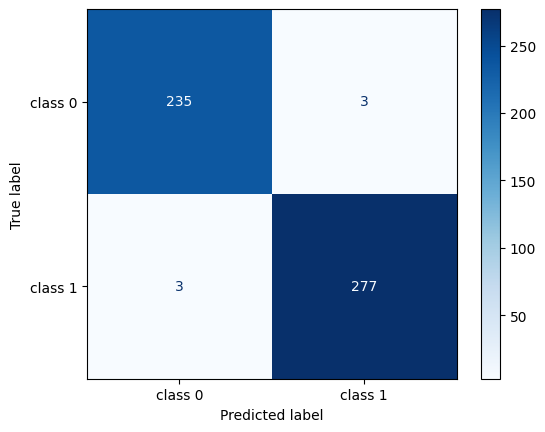

In [45]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,20), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
rlrs=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga'), 
                          parameters,cv=5, n_jobs=-1, verbose=3, random_state=42)
# fit on the trainning dataset
rlrs.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)
print("tuned hpyerparameters :(best parameters) ",rlrs.best_params_)
print("Score:",rlrs.best_score_)
y_predrlrs = rlrs.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrs, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [46]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predrlrs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]


R_totales = pd.DataFrame()
R_aciertos =pd.DataFrame()
R_errores=  pd.DataFrame()

val='Primero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 0    238
1    280
Name: Primero, dtype: int64
Aciertos de Predicción:
 0    235
1    277
Name: Primero, dtype: int64
Errores de Predicción:
 0    3
1    3
Name: Primero, dtype: int64
Total Correctas: 512, Total Errores: 6


In [47]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrlrs))

El coeficiente de correlacion de Matthews es de  0.9766806722689075


### Grid Search and Recursive Feature Elimination

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Elapsed time: 2.46 min.
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       238
     class 1       0.99      0.99      0.99       280

    accuracy                           0.99       518
   macro avg       0.99      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518



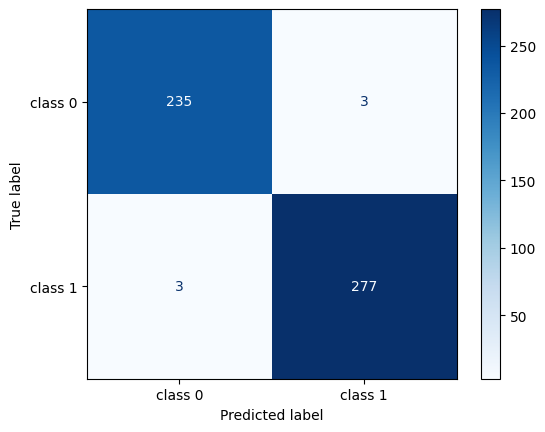

In [48]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
estimator = LogisticRegression(class_weight='balanced', solver='saga')

# Inicializar el selector RFE
selector = RFE(estimator)

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'estimator__C': np.logspace(-3, 3, 10),  # Hiperparámetro de regularización para la regresión logística
    'estimator__penalty': ["l1", "l2"],  # Tipo de penalización para la regresión logística
    'n_features_to_select': [3, 5, 10,15,20,25,30,35,40,45]  # Prueba con diferentes números de características seleccionadas
}

# Inicializar Randomized Search con Cross Validation
rlgs = GridSearchCV(selector, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
rlgs.fit(df_X_train_stand,y_train)

# Obtener el mejor modelo
best_model = rlgs.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predrlrsaa = best_model.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrsaa, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrsaa)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [49]:
# Seleccionar las características en los conjuntos de entrenamiento y prueba utilizando el mejor modelo
X_train_selected = best_model.transform(df_X_train_stand)
X_train_selected=pd.DataFrame(X_train_selected)
X_train_selected.head()


0         1         2
0 -1.137441 -0.195823 -1.013199
1 -1.101745 -0.255920 -1.339011
2 -1.137441  0.043165 -1.122863
3  0.861563 -0.246523  0.892689
4 -1.101745 -0.255920 -1.339011

In [50]:
# Recuperar los nombres de las características originales
feature_names = df_X_train_stand.columns

# Recuperar los índices de las características seleccionadas
selected_feature_indices = [i for i, selected in enumerate(best_model.support_) if selected]

# Recuperar los nombres de las características seleccionadas
selected_feature_names = feature_names[selected_feature_indices]


In [51]:
X_train_selected=X_train_selected.set_axis(selected_feature_names, axis=1)

#### VIF RFE 

Revisamos la multicolinealidad de nuestras features seleccionadas por el metodo RFE

In [52]:
# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_selected.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_selected.values, i)
    for i in range(len(X_train_selected.columns))]

print(vif_datarfe)

         feature        VIF
0      min_bpktl  15.003831
1       max_bipt   1.206915
2  mean_flowpktl  14.992282


Observamos que se encuentran elevadas las features mean_fpktl y mean_flowpktl, procedemos a eliminar una de ellas para comprobar la multicolinealidad nuevamente

In [53]:
X_train_rfeprueba=X_train_selected.drop([],axis=1) 

# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_rfeprueba.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_rfeprueba.values, i)
    for i in range(len(X_train_rfeprueba.columns))]

print(vif_datarfe)
vif_datarfe.columns

         feature        VIF
0      min_bpktl  15.003831
1       max_bipt   1.206915
2  mean_flowpktl  14.992282


Index(['feature', 'VIF'], dtype='object')

Al eliminar las columnas de **mean_fpktl** y **std_flowpktl** se redujo la multicolinealidad a niveles aceptables <5, aplicamos los cambios al conjunto de entrenamiento y testing 

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [54]:
dfrfe=df_train_f.copy()
dfrfe=dfrfe.drop(['label','Ataque'],axis=1)
print(dfrfe.shape)
print("NaN, :", df_train_f['label'].isna().sum())

dfrfe = best_model.transform(dfrfe)
dfrfe=pd.DataFrame(dfrfe)
dfrfe=dfrfe.set_axis(selected_feature_names,axis=1)
# dfrfe=dfrfe.drop(['min_fpktl','min_bpktl'],axis=1) 

dfrfe.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
print(dfrfe.shape)
dfrfe['label1']=df_train_f['label'].astype('int')
dfrfe['Ataque']=df_train_f['Ataque'].astype('int')
print(dfrfe.shape)

print(dfrfe.duplicated().sum())
dfrfe=dfrfe.drop_duplicates()
print("Dimensiones subconjunto RFE: ", dfrfe.shape)
print("NaN, :", dfrfe['label1'].isna().sum())

#Splitting
X_train_rfe,X_test_rfe,y_trainrfe,y_testrfe = train_test_split(dfrfe.drop(columns=['label1']), dfrfe['label1'], test_size=0.3, random_state=42)
print(X_train_rfe.shape)
X_test_rfe
RFE_train=X_train_rfe['Ataque']
RFE_test=X_test_rfe['Ataque']
print("Antes    X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
X_train_rfe=X_train_rfe.drop(['Ataque'],axis=1)
X_test_rfe=X_test_rfe.drop(['Ataque'],axis=1)
print("Despues  X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
print("RFE_train: ", RFE_train.shape, "RFE_test: ", RFE_test.shape)

#Estandarizacion
numeric_cols = X_train_rfe.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_rfe.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_rfe)
X_train_rfe = preprocessor.transform(X_train_rfe)
X_test_rfe  = preprocessor.transform(X_test_rfe)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_rfe=pd.DataFrame(X_train_rfe,columns=labels)
X_test_rfe=pd.DataFrame(X_test_rfe,columns=labels)



(1724, 39)
NaN, : 0
(1724, 3)
(1724, 5)
282
Dimensiones subconjunto RFE:  (1442, 5)
NaN, : 0
(1009, 4)
Antes    X_train_rfe:  (1009, 4) X_test_rfe:  (433, 4)
Despues  X_train_rfe:  (1009, 3) X_test_rfe:  (433, 3)
RFE_train:  (1009,) RFE_test:  (433,)


In [55]:
print("Dimensiones trainrfe: ",X_train_rfe.shape, "y test: ", X_test_rfe.shape)
print(y_trainrfe.shape)
print(y_testrfe.shape)
X_test_rfe.head()


Dimensiones trainrfe:  (1009, 3) y test:  (433, 3)
(1009,)
(433,)


min_bpktl  max_bipt  mean_flowpktl
0   0.701765 -0.286004       0.746378
1   0.677983 -0.285822       0.725494
2   0.701765 -0.285997       0.742897
3   0.692253 -0.285986       0.734195
4   0.682740 -0.285393       0.732455

#### Entrenando modelo con RFE

In [56]:
start=perf_counter()

# Entrenar el modelo de regresión logística con las características seleccionadas y los hiperparámetros óptimos
model = LogisticRegression(C=rlgs.best_params_['estimator__C'], penalty=rlgs.best_params_['estimator__penalty'],
                           class_weight='balanced', solver='saga', max_iter=1500)
model.fit(X_train_rfe, y_trainrfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_predrlgs = model.predict(X_test_rfe)
accuracy = roc_auc_score(y_testrfe, y_predrlgs)
print("Best Parameters:", rlgs.best_params_)
print("Score:", rlgs.best_score_)

Elapsed time: 0.00 min.
Best Parameters: {'estimator__C': np.float64(0.1), 'estimator__penalty': 'l2', 'n_features_to_select': 3}
Score: 0.98424608209595


              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       168
     class 1       1.00      0.99      0.99       265

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



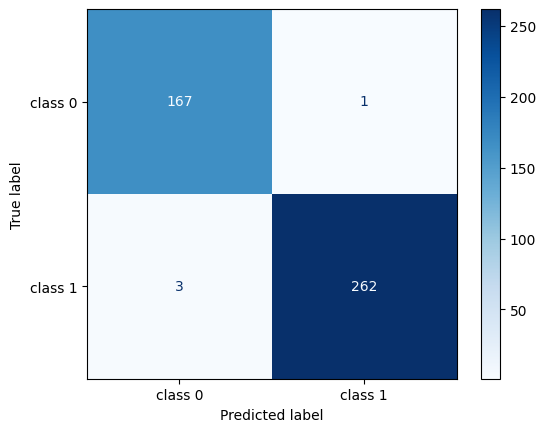

In [57]:
#performance results
print(classification_report(y_testrfe, y_predrlgs, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predrlgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [58]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predrlgs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Segundo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 0    168
1    265
Name: Segundo, dtype: int64
Aciertos de Predicción:
 0    167
1    262
Name: Segundo, dtype: int64
Errores de Predicción:
 0    1
1    3
Name: Segundo, dtype: int64
Total Correctas: 429, Total Errores: 4


In [59]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predrlgs))

El coeficiente de correlacion de Matthews es de  0.9806365389385855


### RL con Optuna sin RFE

In [60]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(df_X_train_stand,y_train)

    # Predice en el conjunto de prueba
    y_predrlo = rlo.predict(df_X_test_stand)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_test, y_predrlo)

    return lloss


In [61]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',random_state=42)
best_modelrlo.fit(df_X_train_stand, y_train)

# Predice en el conjunto de prueba

y_predbrlo = best_modelrlo.predict(df_X_test_stand)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Mejores hiperparámetros: {'penalty': 'l1', 'C': 0.024794080190172478}
Elapsed time: 0.44 min.


              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       238
     class 1       0.99      0.99      0.99       280

    accuracy                           0.99       518
   macro avg       0.99      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518



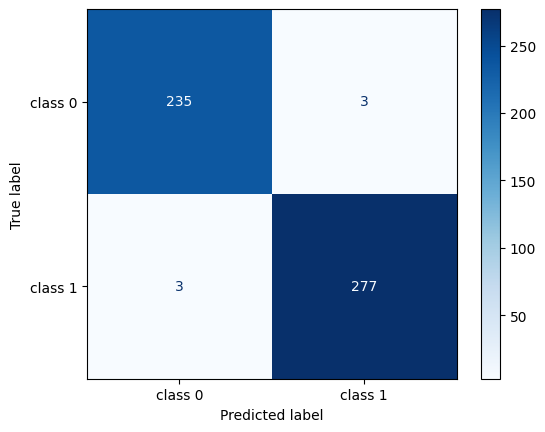

In [62]:
#performance results
print(classification_report(y_test, y_predbrlo, target_names=target_names))

cm = confusion_matrix(y_test, y_predbrlo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predbrlo
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Tercero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    238
1    280
Name: Tercero, dtype: int64
Aciertos de Predicción:
 0    235
1    277
Name: Tercero, dtype: int64
Errores de Predicción:
 0    3
1    3
Name: Tercero, dtype: int64
Total Correctas: 512, Total Errores: 6


In [64]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predbrlo))

El coeficiente de correlacion de Matthews es de  0.9766806722689075


### RL con Optuna y RFE

In [65]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(X_train_rfe,y_trainrfe)

    # Predice en el conjunto de prueba
    y_predrlorfe = rlo.predict(X_test_rfe)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_testrfe, y_predrlorfe)

    return lloss


Mejores hiperparámetros: {'penalty': 'l2', 'C': 2.90100194200179}
Elapsed time: 0.11 min.
              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       168
     class 1       1.00      0.99      0.99       265

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



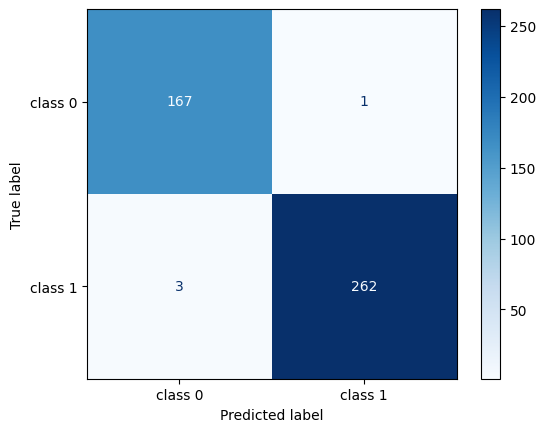

In [66]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',)
best_modelrlo.fit(X_train_rfe, y_trainrfe)

# Predice en el conjunto de prueba

y_predbrlorfe = best_modelrlo.predict(X_test_rfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

#performance results
print(classification_report(y_testrfe, y_predbrlorfe, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predbrlorfe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predbrlorfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Cuarto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    168
1    265
Name: Cuarto, dtype: int64
Aciertos de Predicción:
 0    167
1    262
Name: Cuarto, dtype: int64
Errores de Predicción:
 0    1
1    3
Name: Cuarto, dtype: int64
Total Correctas: 429, Total Errores: 4


In [68]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predbrlorfe))

El coeficiente de correlacion de Matthews es de  0.9806365389385855


## Decision Tree

### Sin Feature Importances

In [69]:
start=perf_counter()

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(df_X_train_stand, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


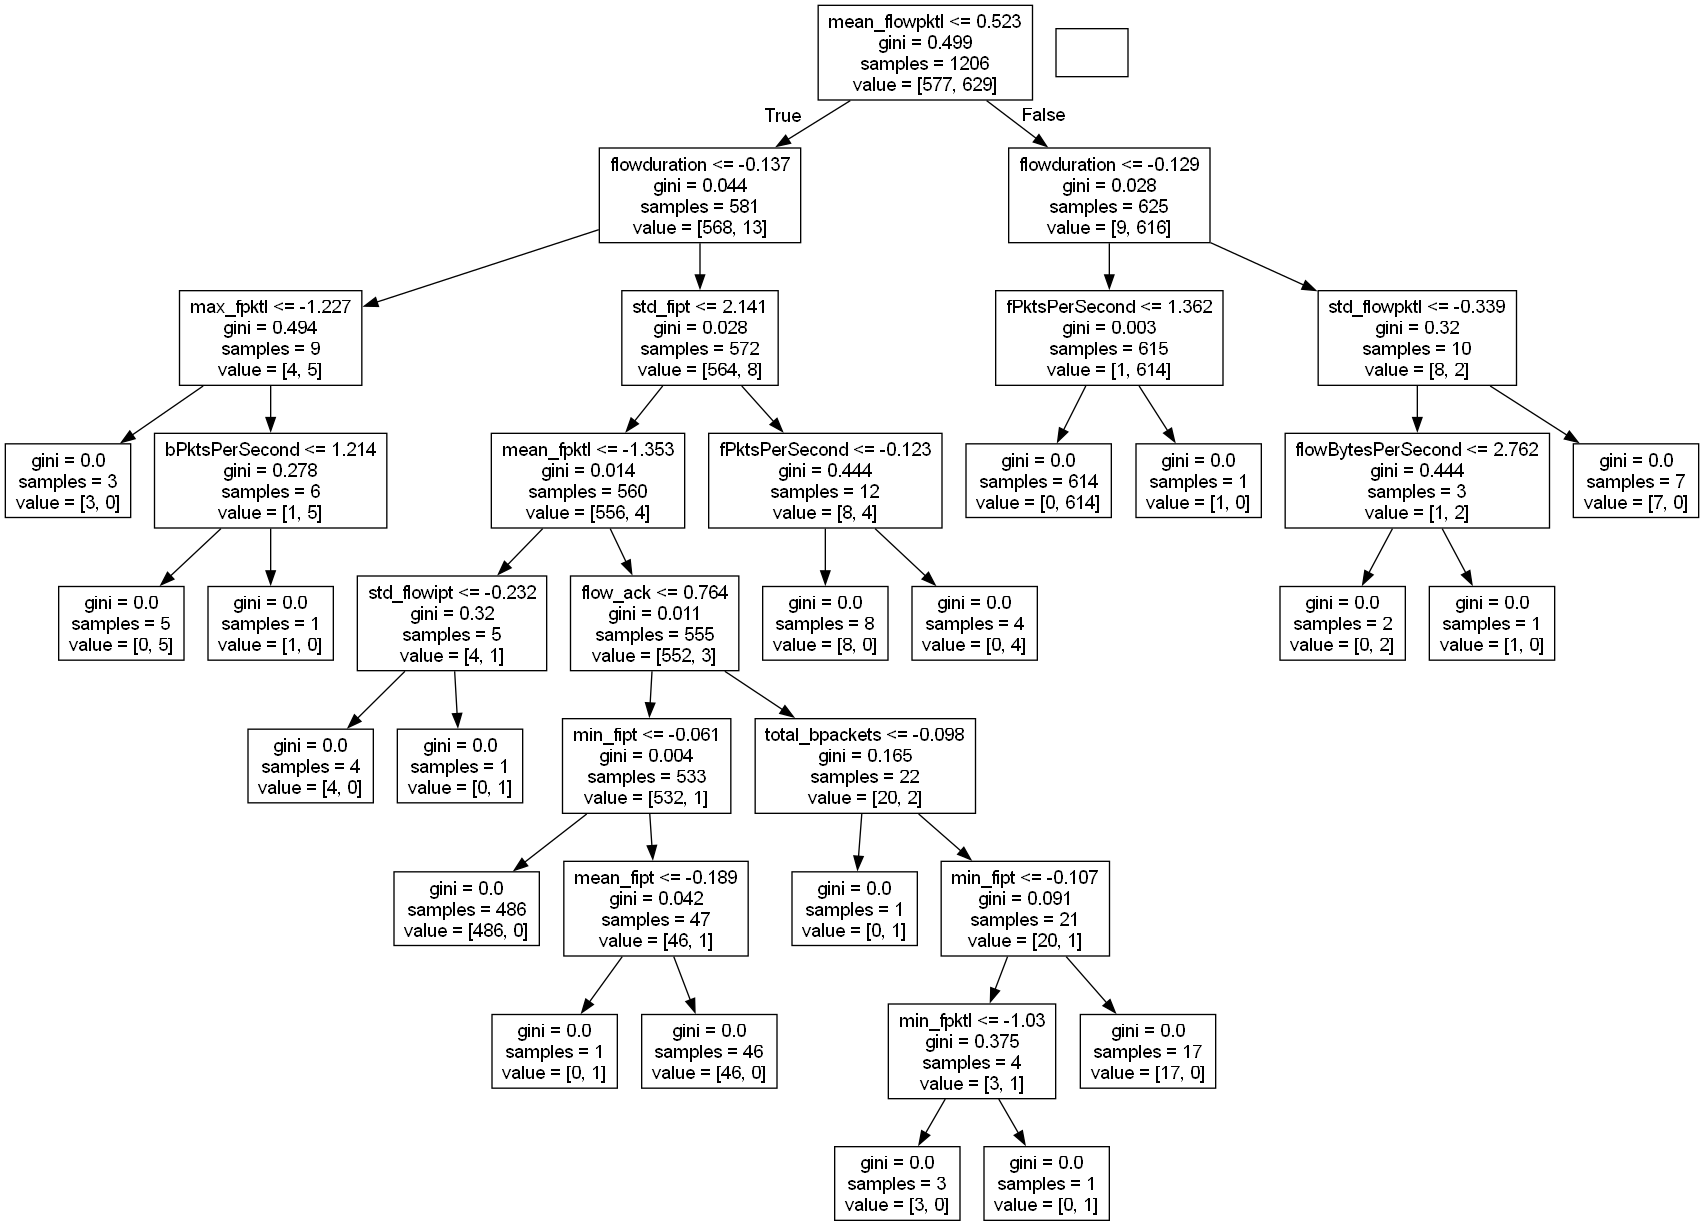

In [70]:
# Conjunto de variables predictoras
X = df_train_f.copy()
X.drop(['label', 'Ataque'],axis=1,inplace=True)

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [71]:
# Testing model
y_preddt = dt.predict(df_X_test_stand)
y_probdt = dt.predict_proba(df_X_test_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddt, y_test))

Accuracy of Decision Tree-Test:  0.9980694980694981


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       280

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



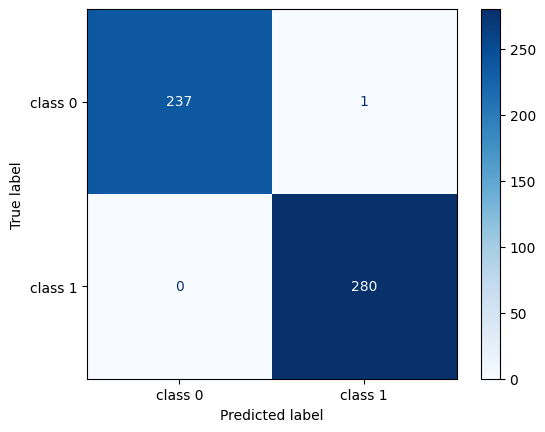

In [72]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_preddt))
ConfusionMatrixDisplay.from_predictions(y_test, y_preddt, display_labels=target_names, cmap=plt.cm.Blues)

In [73]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_preddt
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    238
1    280
Name: Quinto, dtype: int64
Aciertos de Predicción:
 0    237
1    280
Name: Quinto, dtype: int64
Errores de Predicción:
 0    1.0
1    NaN
Name: Quinto, dtype: float64
Total Correctas: 517, Total Errores: 1


In [74]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_preddt))

El coeficiente de correlacion de Matthews es de  0.9961197483569825


### Con Feature Importances

Calculamos la `feature_iportances_` obtenida con el modelo anterior

In [75]:
df_X_test_stand.columns[:]

Index(['flowduration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'total_fipt',
       'total_bipt', 'min_fipt', 'min_bipt', 'max_fipt', 'max_bipt',
       'mean_fipt', 'mean_bipt', 'std_fipt', 'std_bipt', 'fpsh_cnt',
       'bpsh_cnt', 'total_fhlen', 'total_bhlen', 'fPktsPerSecond',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'mean_flowipt', 'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst',
       'flow_ack', 'downUpRatio'],
      dtype='object')

In [76]:
feature_importances = dt.feature_importances_
feature_importances = pd.DataFrame([feature_importances], columns=df_X_test_stand.columns[:])


Creamos un duplicado de nuestros conjuntos de entrenamiento y testing

In [77]:
feature_importances


flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.029477             0.0        0.002877          0.0          0.0   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0   0.002492        0.0   0.004615        0.0    0.000624         0.0   

   std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  max_fipt  \
0        0.0        0.0         0.0         0.0  0.000737       0.0       0.0   

   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  bpsh_cnt  \
0       0.0   0.003252        0.0  0.004154       0.0       0.0       0.0   

   total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0          0.0          0.0        0.012179        0.002769   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0            0.002215       0.928293      0.003101           0.0     0.002658   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  
0       0.0       0.0       0.0  0.000557          0.0

Ordenamos por importancia

In [78]:
feature_importances_transposed = feature_importances.transpose()

# Renombrar la columna
feature_importances_transposed.columns = ['importance']

# Ordenar las características de mayor a menor importancia
sorted_features = feature_importances_transposed.sort_values(by='importance', ascending=False)

sorted_features=sorted_features.transpose()
sorted_features

mean_flowpktl  flowduration  fPktsPerSecond  max_fpktl  std_fipt  \
importance       0.928293      0.029477        0.012179   0.004615  0.004154   

            mean_fipt  std_flowpktl  total_bpackets  bPktsPerSecond  \
importance   0.003252      0.003101        0.002877        0.002769   

            std_flowipt  min_fpktl  flowBytesPerSecond  min_fipt  mean_fpktl  \
importance     0.002658   0.002492            0.002215  0.000737    0.000624   

            flow_ack  min_bpktl  total_bpktl  total_fpktl  total_fpackets  \
importance  0.000557        0.0          0.0          0.0             0.0   

            total_bipt  std_fpktl  max_bpktl  mean_bpktl  std_bipt  mean_bipt  \
importance         0.0        0.0        0.0         0.0       0.0        0.0   

            max_fipt  max_bipt  min_bipt  std_bpktl  total_fipt  total_bhlen  \
importance       0.0       0.0       0.0        0.0         0.0          0.0   

            fpsh_cnt  bpsh_cnt  total_fhlen  mean_flowipt  flow_fin  flow_syn  \
importance       0.0       0.0          0.0           0.0       0.0       0.0   

            flow_rst  downUpRatio  
importance       0.0          0.0

Aplicamos el siguiente ciclo for para eliminar las columnas con una importancia de 0

In [79]:
Xfitrain = pd.DataFrame()
Xfitest  = pd.DataFrame()
fidt     = pd.DataFrame()
dffi     = pd.DataFrame()

ncol=feature_importances.shape[1]

for i in range(0, ncol):
    if(feature_importances.at[0,feature_importances.columns[i]]>0):
        Xfitrain[feature_importances.columns[i]]= df_X_train_stand[feature_importances.columns[i]]
        Xfitest[feature_importances.columns[i]]= df_X_test_stand[feature_importances.columns[i]]
        dffi[feature_importances.columns[i]]= df_train_f[feature_importances.columns[i]]
        fidt[feature_importances.columns[i]] = feature_importances[feature_importances.columns[i]]

print(feature_importances.shape)
fidt

(1, 39)


flowduration  total_bpackets  min_fpktl  max_fpktl  mean_fpktl  min_fipt  \
0      0.029477        0.002877   0.002492   0.004615    0.000624  0.000737   

   mean_fipt  std_fipt  fPktsPerSecond  bPktsPerSecond  flowBytesPerSecond  \
0   0.003252  0.004154        0.012179        0.002769            0.002215   

   mean_flowpktl  std_flowpktl  std_flowipt  flow_ack  
0       0.928293      0.003101     0.002658  0.000557

#### VIF Feature Importance

A las features clasificadas con el metodo `feature_iportances_` le calculamos la multicolinealidad por medio de `VIF`

In [80]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xfitrain.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(Xfitrain.values, i)
    for i in range(len(Xfitrain.columns))]

print(vif_data)

               feature        VIF
0         flowduration   1.203785
1       total_bpackets   1.215106
2            min_fpktl  20.795621
3            max_fpktl  16.608952
4           mean_fpktl  77.437769
5             min_fipt  23.205382
6            mean_fipt  32.626856
7             std_fipt  15.577518
8       fPktsPerSecond  27.243255
9       bPktsPerSecond  20.728326
10  flowBytesPerSecond   3.771096
11       mean_flowpktl  82.666055
12        std_flowpktl   6.778865
13         std_flowipt  36.287546
14            flow_ack   1.284788


Observamos niveles altos de multicolinealidad, procedemos a eliminar de manera manual las features con niveles altos de VIF y bajos niveles de importancia

In [81]:
sorted_features

mean_flowpktl  flowduration  fPktsPerSecond  max_fpktl  std_fipt  \
importance       0.928293      0.029477        0.012179   0.004615  0.004154   

            mean_fipt  std_flowpktl  total_bpackets  bPktsPerSecond  \
importance   0.003252      0.003101        0.002877        0.002769   

            std_flowipt  min_fpktl  flowBytesPerSecond  min_fipt  mean_fpktl  \
importance     0.002658   0.002492            0.002215  0.000737    0.000624   

            flow_ack  min_bpktl  total_bpktl  total_fpktl  total_fpackets  \
importance  0.000557        0.0          0.0          0.0             0.0   

            total_bipt  std_fpktl  max_bpktl  mean_bpktl  std_bipt  mean_bipt  \
importance         0.0        0.0        0.0         0.0       0.0        0.0   

            max_fipt  max_bipt  min_bipt  std_bpktl  total_fipt  total_bhlen  \
importance       0.0       0.0       0.0        0.0         0.0          0.0   

            fpsh_cnt  bpsh_cnt  total_fhlen  mean_flowipt  flow_fin  flow_syn  \
importance       0.0       0.0          0.0           0.0       0.0       0.0   

            flow_rst  downUpRatio  
importance       0.0          0.0

In [82]:
X_fi_prueba=Xfitrain.drop(['mean_fpktl','bPktsPerSecond','std_flowipt','mean_fipt','max_fpktl','min_fpktl'], axis=1) 

In [83]:
X_fi_prueba.columns

Index(['flowduration', 'total_bpackets', 'min_fipt', 'std_fipt',
       'fPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'flow_ack'],
      dtype='object')

In [84]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_fi_prueba.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X_fi_prueba.values, i)
    for i in range(len(X_fi_prueba.columns))]

print(vif_data)

              feature       VIF
0        flowduration  1.113025
1      total_bpackets  1.003004
2            min_fipt  1.047677
3            std_fipt  1.308363
4      fPktsPerSecond  2.114412
5  flowBytesPerSecond  2.093367
6       mean_flowpktl  1.338071
7        std_flowpktl  1.557086
8            flow_ack  1.038229


Reduciendo asi los valores a niveles aceptables de multicolinealidad <5

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [85]:
dffii=dffi.drop(['mean_fpktl','bPktsPerSecond','std_flowipt','mean_fipt','max_fpktl','min_fpktl'], axis=1) 
print(dffii.shape)


dffii.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
dffii['label']=df_train_f['label'].astype('int')
print("NaN, :", df_train_f['label'].isna().sum())
print("NaNd, :", dffii['label'].isna().sum())

print(dffii.shape)
dffii['Ataque']=df_train_f['Ataque']
print("Con Ataque ", dffii.shape)

print(dffii.duplicated().sum())
dffii=dffii.drop_duplicates()
print("Dimensiones suboconjunto Fi: ", dffii.shape)
print("NaN, :", dffii['label'].isna().sum())

#Splitting
X_train_fi,X_test_fi,y_trainfi,y_testfi = train_test_split(dffii.drop(columns=['label']), dffii['label'], test_size=0.3, random_state=42)

print("Antes X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
FI_train=X_train_fi['Ataque']
X_train_fi=X_train_fi.drop(['Ataque'],axis=1)
FI_test=X_test_fi['Ataque']
X_test_fi=X_test_fi.drop(['Ataque'],axis=1)
print("Despues X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
print("Con FI_train: ", FI_train.shape, "FI_test: ", FI_test.shape)

#Estandarizacion
numeric_cols = X_train_fi.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_fi.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_fi)
X_train_fi = preprocessor.transform(X_train_fi)
X_test_fi  = preprocessor.transform(X_test_fi)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_fi=pd.DataFrame(X_train_fi,columns=labels)
X_test_fi=pd.DataFrame(X_test_fi,columns=labels)


(1724, 9)
NaN, : 0
NaNd, : 0
(1724, 10)
Con Ataque  (1724, 11)
10
Dimensiones suboconjunto Fi:  (1714, 11)
NaN, : 0
Antes X_train_fi:  (1199, 10) X_test_fi:  (515, 10)
Despues X_train_fi:  (1199, 9) X_test_fi:  (515, 9)
Con FI_train:  (1199,) FI_test:  (515,)


In [86]:
print("Subconjunto Recursive Feature Elimination (RFE): ",dfrfe.shape)
print("Subconjunto Feature Importance (FI): ",dffii.shape)

Subconjunto Recursive Feature Elimination (RFE):  (1442, 5)
Subconjunto Feature Importance (FI):  (1714, 11)


In [87]:
print("Nuevas dimensiones conjunto train: ", X_train_fi.shape, "y test: ", X_test_fi.shape)

Nuevas dimensiones conjunto train:  (1199, 9) y test:  (515, 9)


In [88]:
X_train_fi.head()

flowduration  total_bpackets  min_fipt  std_fipt  fPktsPerSecond  \
0     -0.137948       -0.096314 -0.126232 -0.175624       -0.112152   
1      1.469049       -0.090209 -0.126030  1.291746       -0.113696   
2     -0.141546       -0.097809 -0.126255 -0.244648       -0.084912   
3     -0.140338       -0.097186 -0.035786 -0.242141       -0.111394   
4     -0.141546       -0.097809 -0.126255 -0.244648       -0.085018   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  flow_ack  
0           -0.168999      -0.982629      2.008367  4.461565  
1           -0.171600      -0.042304      3.590977 -0.141568  
2           -0.151249      -1.394186     -0.904065 -0.141568  
3           -0.157895       0.884320      0.090392 -0.141568  
4           -0.151323      -1.394186     -0.904065 -0.141568

Con esto, volvemos a entrenar el modelo DecisionTree

In [89]:
start=perf_counter()


dtfi = DecisionTreeClassifier(random_state=42)
dtfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


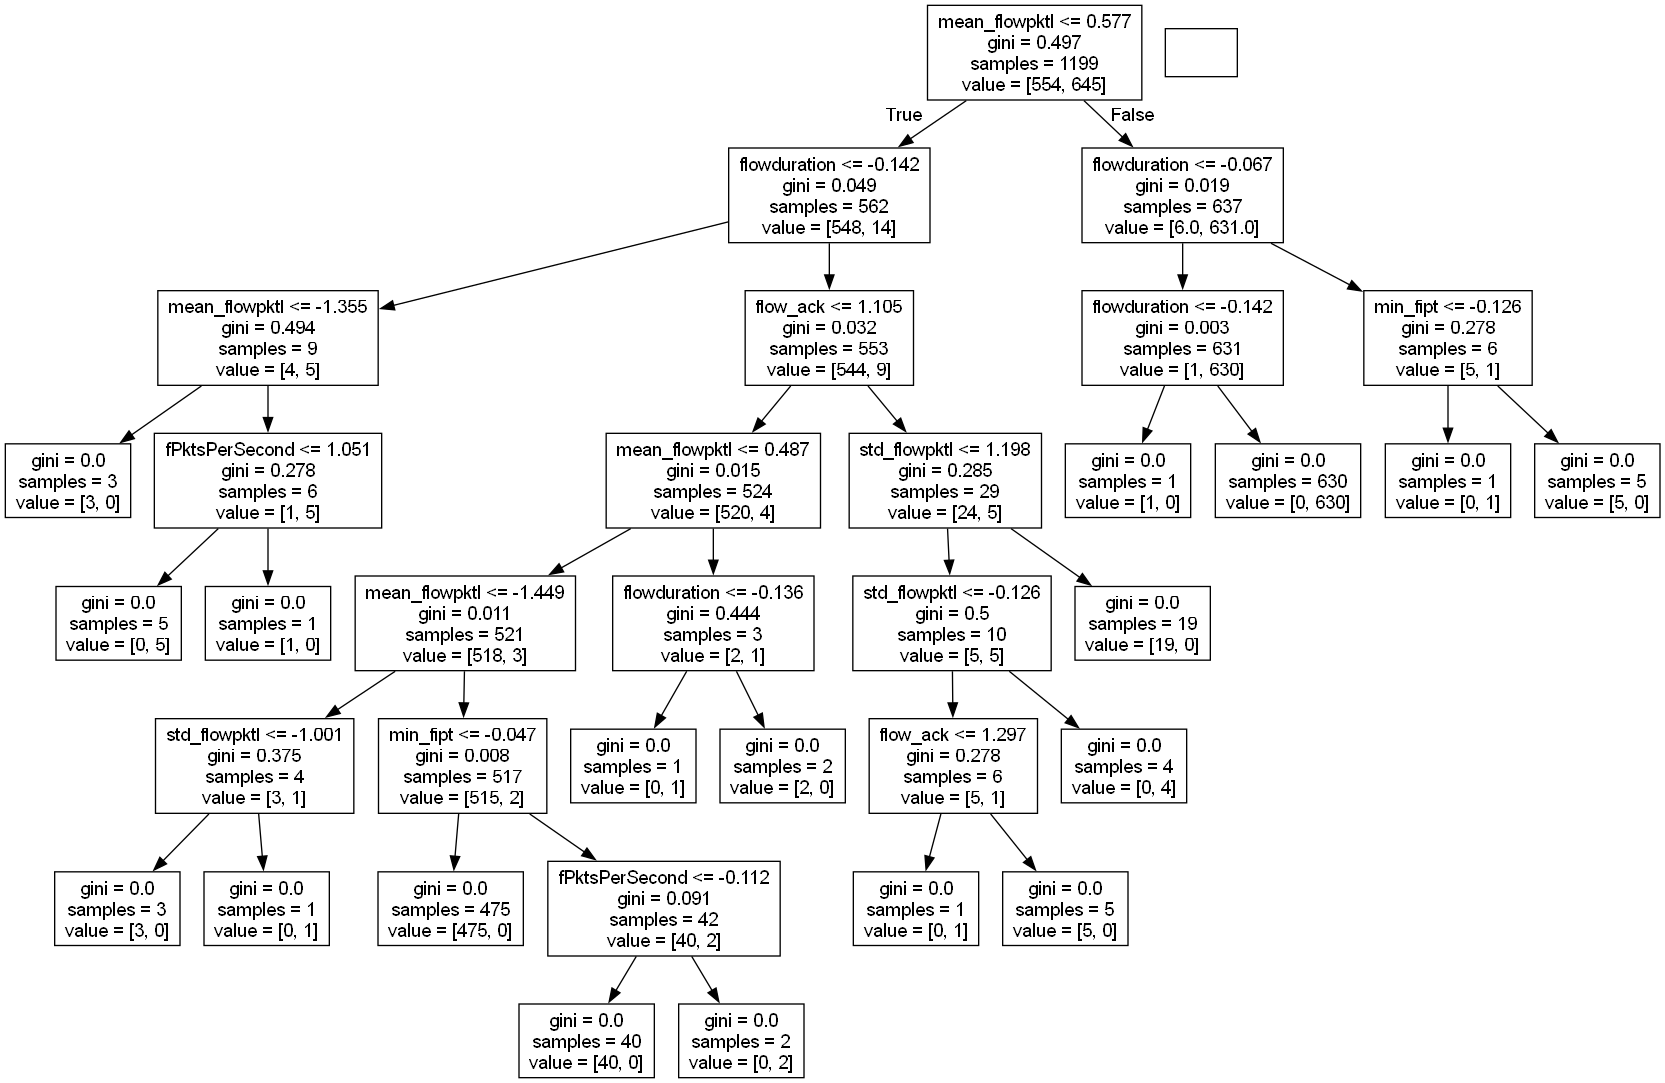

In [90]:
features = X_train_fi.columns
dot_data = export_graphviz(dtfi, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [91]:
# Testing model
y_preddtfi = dtfi.predict(X_test_fi)
y_probdtfi = dtfi.predict_proba(X_test_fi)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddtfi, y_testfi))

Accuracy of Decision Tree-Test:  0.9902912621359223


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       251
           1       0.99      1.00      0.99       264

    accuracy                           0.99       515
   macro avg       0.99      0.99      0.99       515
weighted avg       0.99      0.99      0.99       515



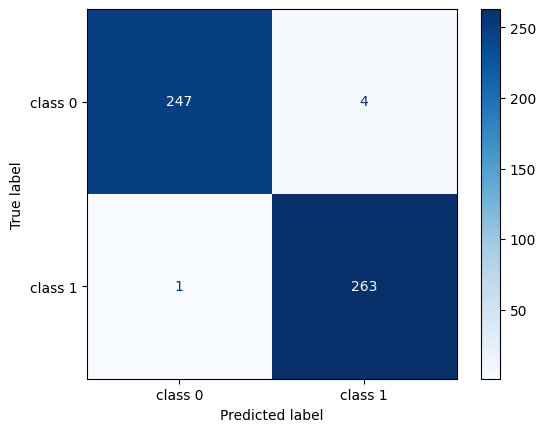

In [92]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtfi, display_labels=target_names, cmap=plt.cm.Blues)

In [93]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Sexto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Sexto, dtype: int64
Aciertos de Predicción:
 0    247
1    263
Name: Sexto, dtype: int64
Errores de Predicción:
 0    4
1    1
Name: Sexto, dtype: int64
Total Correctas: 510, Total Errores: 5


In [94]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtfi))

El coeficiente de correlacion de Matthews es de  0.9806311030134908


Con la seleccion de features aumentamos la Accuracy del modelo de **0.9635** a **0.9673**, procedemos a implementar tecnicas de optimizacion de hiperparametros buscando hacer el modelo mas eficiente

### DT optimization 

Los hiperparametros que se pueden ajustar en los Arboles de Decision son los siguientes
- min_samples_split – Minimum number of samples a node must possess before splitting.
- min_samples_leaf – Minimum number of samples a leaf node must possess.
- min_weight_fraction_leaf – Minimum fraction of the sum total of weights required to be at a leaf node.
- max_leaf_nodes – Maximum number of leaf nodes a decision tree can have.
- max_features – Maximum number of features that are taken into the account for splitting each node.


In [95]:
# Hyperparameter Tuning of DTC
start=perf_counter()

dtop = DecisionTreeClassifier(class_weight='balanced',random_state=42)

params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth' : ['None',2,3,4,5],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2,3,4,5]}

gsearchdtop = GridSearchCV(dtop, param_grid=params, n_jobs=-1, cv=5)

gsearchdtop.fit(X_train_fi, y_trainfi)

print("Best Parameters:", gsearchdtop.best_params_)

mdtop = DecisionTreeClassifier(criterion=gsearchdtop.best_params_['criterion'], max_depth=gsearchdtop.best_params_['max_depth'], min_samples_split=gsearchdtop.best_params_['min_samples_split'], min_samples_leaf=gsearchdtop.best_params_['min_samples_leaf'], 
                           class_weight='balanced',random_state=42)
mdtop.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_preddtop = mdtop.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_preddtop)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Elapsed time: 0.04 min.
Accuracy: 0.9825242718446602


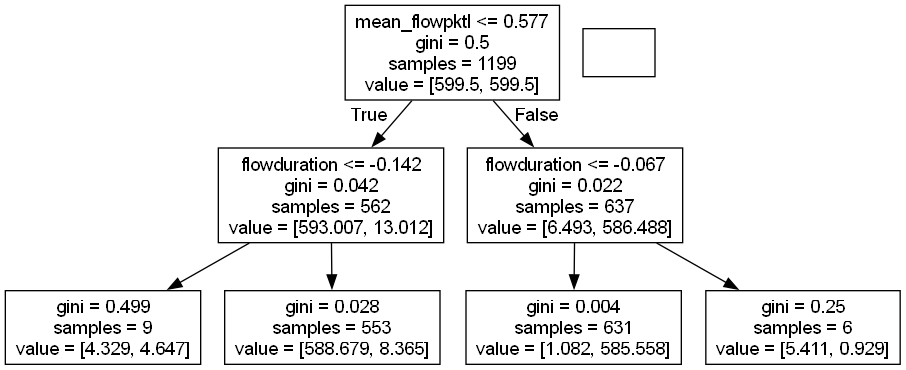

In [96]:
features = X_train_fi.columns
dot_data = export_graphviz(mdtop, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       251
           1       0.98      0.98      0.98       264

    accuracy                           0.98       515
   macro avg       0.98      0.98      0.98       515
weighted avg       0.98      0.98      0.98       515



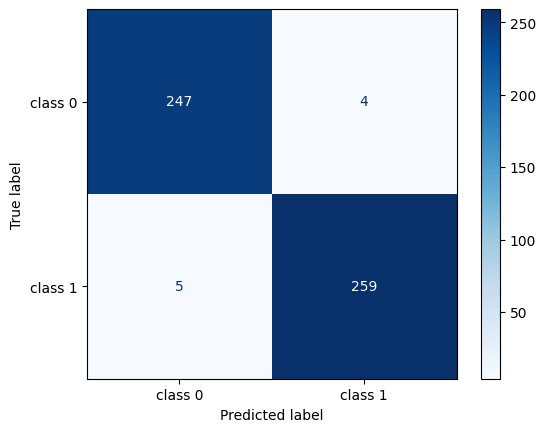

In [97]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtop))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtop, display_labels=target_names, cmap=plt.cm.Blues)

In [98]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtop
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Septimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Septimo, dtype: int64
Aciertos de Predicción:
 0    247
1    259
Name: Septimo, dtype: int64
Errores de Predicción:
 0    4
1    5
Name: Septimo, dtype: int64
Total Correctas: 506, Total Errores: 9


In [99]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtop))

El coeficiente de correlacion de Matthews es de  0.9650369739266574


## XGBoost

### XGBoost con RFE

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 2.24 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.34), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(4), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(100), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9920693561893502
Classification Report:
               precision    recall  f1-sco

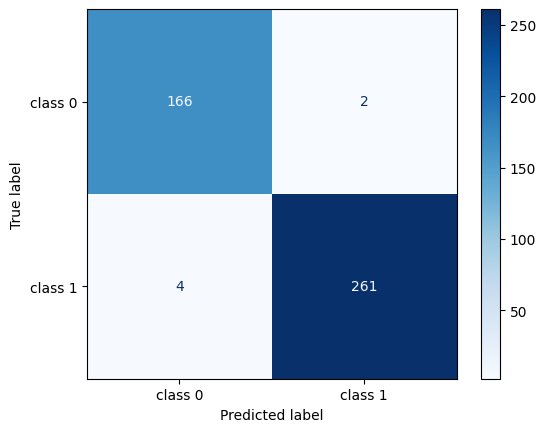

In [100]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':["binary:logistic","binary:logitraw","binary:hinge"],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbrfe = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbrfe.fit(X_train_rfe, y_trainrfe)

# Obtener el mejor modelo
best_xgbmodelrfe = grid_xgbrfe.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Predecir y evaluar el modelo
y_predxgbrfe = grid_xgbrfe.predict(X_test_rfe)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(y_testrfe, y_predxgbrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predxgbrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [101]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predxgbrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Octavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    168
1    265
Name: Octavo, dtype: int64
Aciertos de Predicción:
 0    166
1    261
Name: Octavo, dtype: int64
Errores de Predicción:
 0    2
1    4
Name: Octavo, dtype: int64
Total Correctas: 427, Total Errores: 6


In [102]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predxgbrfe))

El coeficiente de correlacion de Matthews es de  0.9709312608567038


### XGB con FI

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 3.27 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.505), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(2), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(129), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9908263598326361
Classification Report:
               precision    recall  f1-sc

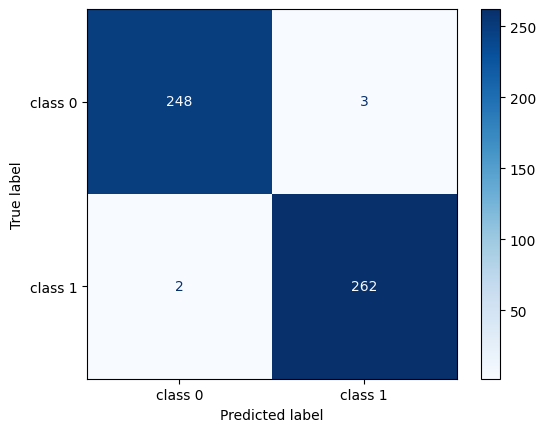

In [103]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':['binary:logistic','binary:logitraw','binary:hinge'],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbfi = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Obtener el mejor modelo
best_xgbmodelfi = grid_xgbfi.best_estimator_


# Predecir y evaluar el modelo
y_predxgbfi = grid_xgbfi.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_predxgbfi)
print("Best Parameters:", best_xgbmodelfi)
print("Score:", grid_xgbfi.best_score_)
print("Classification Report:\n", classification_report(y_testfi, y_predxgbfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predxgbfi, display_labels=target_names, cmap=plt.cm.Blues)

In [104]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predxgbfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Noveno'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Noveno, dtype: int64
Aciertos de Predicción:
 0    248
1    262
Name: Noveno, dtype: int64
Errores de Predicción:
 0    3
1    2
Name: Noveno, dtype: int64
Total Correctas: 510, Total Errores: 5


In [105]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predxgbfi))

El coeficiente de correlacion de Matthews es de  0.9805756427636275


## Random Forest

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Elapsed time: 1.21 min.
Mejor modelo accuracy score: 0.9903
Mejores parámetros:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(420)}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       251
           1       1.00      0.98      0.99       264

    accuracy                           0.99       515
   macro avg       0.99      0.99      0.99       515
weighted avg       0.99      0.99      0.99       515



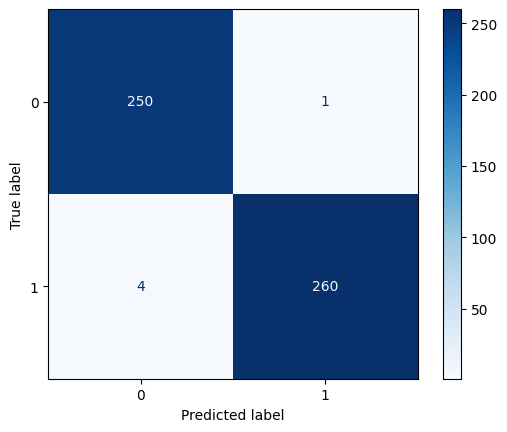

In [106]:

start=perf_counter()

# Define el modelo base a optimizar
clfrf = RandomForestClassifier(random_state=42)

# Define el espacio de búsqueda de parámetros
param_gridrf = {
    'n_estimators': np.linspace(20, 500, 7).astype(int),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth' : [4,6,8,10],  # Máxima profundidad de cada árbol
    'criterion' :['gini', 'entropy']  # Medidas de calidad de la división
}

# Crear objeto GridSearchCV
grid_searchrf = GridSearchCV(estimator=clfrf, param_grid=param_gridrf, cv=5, verbose=3, n_jobs=-1)

# Entrenarlo
grid_searchrf.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Mejor modelo encontrado
best_clfrf = grid_searchrf.best_estimator_

# Predicciones con el mejor modelo
y_predrf = best_clfrf.predict(X_test_fi)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(y_testfi, y_predrf)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(y_testfi, y_predrf))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(y_testfi, y_predrf, cmap=plt.cm.Blues);

In [107]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predrf
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Decimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Decimo, dtype: int64
Aciertos de Predicción:
 0    250
1    260
Name: Decimo, dtype: int64
Errores de Predicción:
 0    1
1    4
Name: Decimo, dtype: int64
Total Correctas: 510, Total Errores: 5


In [108]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predrf))

El coeficiente de correlacion de Matthews es de  0.9806424608777037


## Support Vector Machine

### Con Feature Selection de **RFE**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': np.float64(1.0)}
Elapsed time: 0.01 min.
Accuracy: 0.9884526558891455
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       1.00      0.98      0.99       265

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



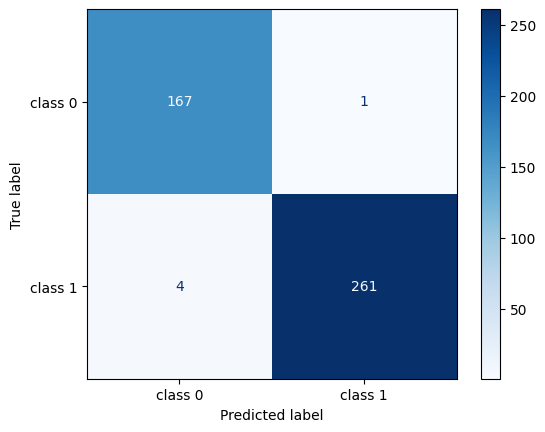

In [109]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 3),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmrfe = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmrfe.fit(X_train_rfe, y_trainrfe)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmrfe.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmrfe = grid_searchsvmrfe.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmrfe = best_modelsvmrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_predsvmrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_predsvmrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predsvmrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [110]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predsvmrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Onceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    168
1    265
Name: Onceavo, dtype: int64
Aciertos de Predicción:
 0    167
1    261
Name: Onceavo, dtype: int64
Errores de Predicción:
 0    1
1    4
Name: Onceavo, dtype: int64
Total Correctas: 428, Total Errores: 5


In [111]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predsvmrfe))

El coeficiente de correlacion de Matthews es de  0.9758674728722314


### Con Feature Selection **FI**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(1.0)}
Elapsed time: 0.02 min.
Accuracy: 0.9864077669902913
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       251
           1       0.99      0.98      0.99       264

    accuracy                           0.99       515
   macro avg       0.99      0.99      0.99       515
weighted avg       0.99      0.99      0.99       515



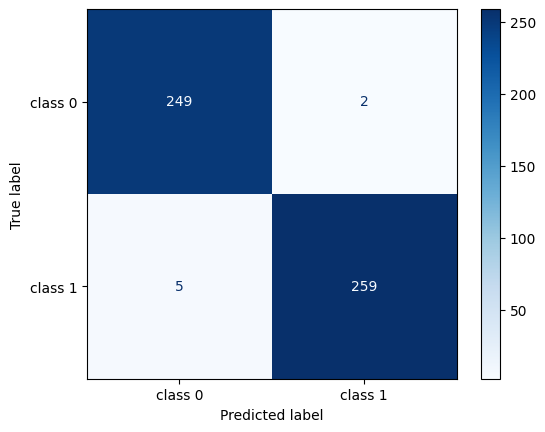

In [112]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 3),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmdt = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmdt.fit(X_train_fi, y_trainfi)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmdt.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmdt = grid_searchsvmdt.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmfi = best_modelsvmdt.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_predsvmfi))
print("Classification Report:\n", classification_report(y_testfi, y_predsvmfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predsvmfi, display_labels=target_names, cmap=plt.cm.Blues)


In [113]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predsvmfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Doceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Doceavo, dtype: int64
Aciertos de Predicción:
 0    249
1    259
Name: Doceavo, dtype: int64
Errores de Predicción:
 0    2
1    5
Name: Doceavo, dtype: int64
Total Correctas: 508, Total Errores: 7


In [114]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predsvmfi))

El coeficiente de correlacion de Matthews es de  0.9728722770609762


## Naive Bayes

### Con RFE

Accuracy: 0.9884526558891455
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       1.00      0.98      0.99       265

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433

El coeficiente de correlacion de Matthews es de  0.9758674728722314


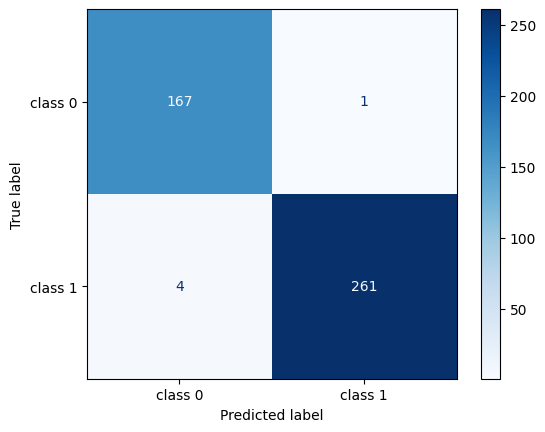

In [158]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnvrfe=GaussianNB()


clfnvrfe.fit(X_train_rfe, y_trainrfe)

y_prednvrfe=clfnvrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_prednvrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_prednvrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_prednvrfe, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_prednvrfe))


In [159]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_prednvrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Treceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    168
1    265
Name: Treceavo, dtype: int64
Aciertos de Predicción:
 0    167
1    261
Name: Treceavo, dtype: int64
Errores de Predicción:
 0    1
1    4
Name: Treceavo, dtype: int64
Total Correctas: 428, Total Errores: 5


### Con FI

Accuracy: 0.9689320388349515
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       251
           1       1.00      0.94      0.97       264

    accuracy                           0.97       515
   macro avg       0.97      0.97      0.97       515
weighted avg       0.97      0.97      0.97       515

El coeficiente de correlacion de Matthews es de  0.9392969851838442


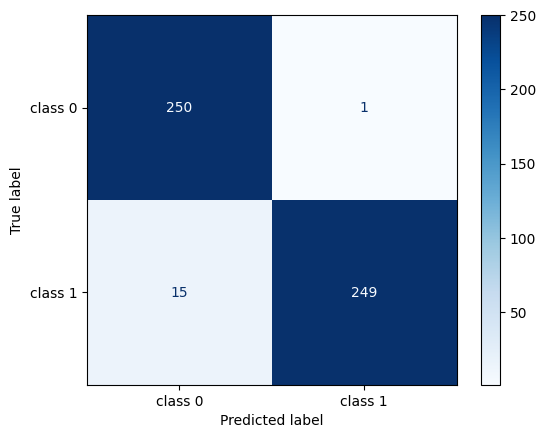

In [150]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnv = GaussianNB()
clfnv.fit(X_train_fi, y_trainfi)

y_prednvfi=clfnv.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_prednvfi))
print("Classification Report:\n", classification_report(y_testfi, y_prednvfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_prednvfi, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_prednvfi))

In [151]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_prednvfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Catorceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Catorceavo, dtype: int64
Aciertos de Predicción:
 0    250
1    249
Name: Catorceavo, dtype: int64
Errores de Predicción:
 0     1
1    15
Name: Catorceavo, dtype: int64
Total Correctas: 499, Total Errores: 16


## Ann

### Optuna y RFE

In [119]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_rfe.shape[1]

#Creo el modelo
best_modelfrnrfe= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrn, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelfrnrfe

    #Callback
    callback= EarlyStopping(monitor='loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrn.fit(X_train_rfe, y_trainrfe, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrn.evaluate(X_test_rfe, y_testrfe, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelfrnrfe = modelrn  # Almacena el modelo si es el mejor hasta ahora
    
    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  5 units per layer:  [768, 1024, 768, 256, 768]


Best trial: 0. Best value: 0.988453:   1%|          | 1/100 [00:32<53:29, 32.42s/it]

Capas  3 units per layer:  [768, 1024, 1024]


Best trial: 0. Best value: 0.988453:   2%|▏         | 2/100 [08:06<7:38:29, 280.71s/it]

Capas  3 units per layer:  [512, 512, 512]


Best trial: 0. Best value: 0.988453:   3%|▎         | 3/100 [08:17<4:14:24, 157.37s/it]

Capas  6 units per layer:  [1024, 768, 512, 256, 1024, 512]


Best trial: 0. Best value: 0.988453:   4%|▍         | 4/100 [08:42<2:48:17, 105.18s/it]

Capas  6 units per layer:  [768, 512, 1024, 1024, 512, 512]


Best trial: 0. Best value: 0.988453:   5%|▌         | 5/100 [14:30<5:04:48, 192.52s/it]

Capas  8 units per layer:  [512, 1024, 768, 512, 512, 256, 768, 1024]


Best trial: 0. Best value: 0.988453:   6%|▌         | 6/100 [15:05<3:37:46, 139.01s/it]

Capas  1 units per layer:  [768]


Best trial: 0. Best value: 0.988453:   7%|▋         | 7/100 [15:07<2:26:22, 94.44s/it] 

Capas  7 units per layer:  [1024, 1024, 1024, 1024, 768, 256, 768]


Best trial: 0. Best value: 0.988453:   8%|▊         | 8/100 [15:39<1:53:55, 74.30s/it]

Capas  8 units per layer:  [1024, 512, 256, 256, 256, 768, 512, 256]


Best trial: 0. Best value: 0.988453:   9%|▉         | 9/100 [16:27<1:40:26, 66.22s/it]

Capas  3 units per layer:  [512, 512, 512]


Best trial: 0. Best value: 0.988453:  10%|█         | 10/100 [16:31<1:10:41, 47.12s/it]

Capas  5 units per layer:  [256, 256, 768, 512, 1024]


Best trial: 0. Best value: 0.988453:  11%|█         | 11/100 [16:59<1:00:59, 41.11s/it]

Capas  3 units per layer:  [768, 1024, 1024]


Best trial: 0. Best value: 0.988453:  12%|█▏        | 12/100 [23:52<3:46:22, 154.35s/it]

Capas  4 units per layer:  [768, 768, 768, 768]


Best trial: 0. Best value: 0.988453:  13%|█▎        | 13/100 [24:07<2:42:22, 111.98s/it]

Capas  1 units per layer:  [256]


Best trial: 0. Best value: 0.988453:  14%|█▍        | 14/100 [24:35<2:04:12, 86.66s/it] 

Capas  4 units per layer:  [768, 1024, 1024, 256]


Best trial: 0. Best value: 0.988453:  15%|█▌        | 15/100 [26:40<2:19:24, 98.40s/it]

Capas  2 units per layer:  [512, 768]


Best trial: 0. Best value: 0.988453:  16%|█▌        | 16/100 [28:38<2:25:40, 104.05s/it]

Capas  4 units per layer:  [1024, 1024, 768, 768]


Best trial: 0. Best value: 0.988453:  17%|█▋        | 17/100 [29:28<2:01:40, 87.95s/it] 

Capas  5 units per layer:  [768, 768, 1024, 512, 768]


Best trial: 17. Best value: 0.990762:  18%|█▊        | 18/100 [30:06<1:39:45, 72.99s/it]

Capas  6 units per layer:  [512, 768, 768, 512, 768, 1024]


Best trial: 17. Best value: 0.990762:  19%|█▉        | 19/100 [30:33<1:19:40, 59.02s/it]

Capas  5 units per layer:  [1024, 768, 256, 256, 768]


Best trial: 17. Best value: 0.990762:  20%|██        | 20/100 [30:50<1:01:55, 46.45s/it]

Capas  7 units per layer:  [768, 256, 1024, 512, 768, 1024, 256]


Best trial: 17. Best value: 0.990762:  21%|██        | 21/100 [31:26<56:58, 43.27s/it]  

Capas  5 units per layer:  [768, 1024, 1024, 768, 512]


Best trial: 17. Best value: 0.990762:  22%|██▏       | 22/100 [39:33<3:49:26, 176.49s/it]

Capas  2 units per layer:  [768, 1024]


Best trial: 17. Best value: 0.990762:  23%|██▎       | 23/100 [39:49<2:44:31, 128.20s/it]

Capas  4 units per layer:  [768, 768, 1024, 256]


Best trial: 17. Best value: 0.990762:  24%|██▍       | 24/100 [41:03<2:22:03, 112.15s/it]

Capas  5 units per layer:  [512, 1024, 768, 512, 1024]


Best trial: 17. Best value: 0.990762:  25%|██▌       | 25/100 [46:18<3:36:15, 173.01s/it]

Capas  2 units per layer:  [768, 768]


Best trial: 17. Best value: 0.990762:  26%|██▌       | 26/100 [46:33<2:34:52, 125.58s/it]

Capas  6 units per layer:  [1024, 1024, 1024, 256, 768, 768]


Best trial: 17. Best value: 0.990762:  27%|██▋       | 27/100 [47:21<2:04:33, 102.37s/it]

Capas  3 units per layer:  [768, 768, 768]


Best trial: 17. Best value: 0.990762:  28%|██▊       | 28/100 [50:50<2:41:06, 134.25s/it]

Capas  7 units per layer:  [512, 1024, 1024, 512, 256, 256, 1024]


Best trial: 17. Best value: 0.990762:  29%|██▉       | 29/100 [52:58<2:36:44, 132.46s/it]

Capas  3 units per layer:  [256, 1024, 512]


Best trial: 17. Best value: 0.990762:  30%|███       | 30/100 [53:22<1:56:26, 99.81s/it] 

Capas  4 units per layer:  [1024, 768, 768, 768]


Best trial: 17. Best value: 0.990762:  31%|███       | 31/100 [56:51<2:32:19, 132.45s/it]

Capas  3 units per layer:  [512, 512, 512]


Best trial: 17. Best value: 0.990762:  32%|███▏      | 32/100 [57:00<1:48:13, 95.50s/it] 

Capas  3 units per layer:  [512, 512, 512]


Best trial: 17. Best value: 0.990762:  33%|███▎      | 33/100 [57:09<1:17:40, 69.56s/it]

Capas  5 units per layer:  [768, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  34%|███▍      | 34/100 [57:20<57:16, 52.07s/it]  

Capas  5 units per layer:  [768, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  35%|███▌      | 35/100 [57:31<43:05, 39.78s/it]

Capas  5 units per layer:  [768, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  36%|███▌      | 36/100 [57:42<33:01, 30.97s/it]

Capas  6 units per layer:  [512, 256, 256, 512, 512, 768]


Best trial: 17. Best value: 0.990762:  37%|███▋      | 37/100 [57:58<27:54, 26.58s/it]

Capas  6 units per layer:  [768, 512, 256, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  38%|███▊      | 38/100 [58:05<21:27, 20.77s/it]

Capas  5 units per layer:  [512, 512, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  39%|███▉      | 39/100 [58:14<17:33, 17.27s/it]

Capas  4 units per layer:  [768, 256, 512, 256]


Best trial: 17. Best value: 0.990762:  40%|████      | 40/100 [58:23<14:48, 14.80s/it]

Capas  5 units per layer:  [512, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  41%|████      | 41/100 [58:34<13:21, 13.58s/it]

Capas  6 units per layer:  [512, 256, 256, 512, 512, 768]


Best trial: 17. Best value: 0.990762:  42%|████▏     | 42/100 [58:51<14:02, 14.52s/it]

Capas  6 units per layer:  [256, 256, 256, 512, 512, 1024]


Best trial: 17. Best value: 0.990762:  43%|████▎     | 43/100 [59:06<13:52, 14.60s/it]

Capas  7 units per layer:  [512, 512, 512, 512, 256, 768, 256]


Best trial: 17. Best value: 0.990762:  44%|████▍     | 44/100 [59:21<13:45, 14.75s/it]

Capas  6 units per layer:  [768, 256, 256, 768, 512, 512]


Best trial: 17. Best value: 0.990762:  45%|████▌     | 45/100 [59:33<12:45, 13.92s/it]

Capas  5 units per layer:  [512, 512, 256, 256, 768]


Best trial: 17. Best value: 0.990762:  46%|████▌     | 46/100 [59:43<11:35, 12.87s/it]

Capas  6 units per layer:  [768, 512, 512, 256, 512, 1024]


Best trial: 17. Best value: 0.990762:  47%|████▋     | 47/100 [59:56<11:30, 13.03s/it]

Capas  4 units per layer:  [512, 512, 256, 512]


Best trial: 17. Best value: 0.990762:  48%|████▊     | 48/100 [1:00:06<10:24, 12.00s/it]

Capas  5 units per layer:  [768, 256, 256, 1024, 256]


Best trial: 17. Best value: 0.990762:  49%|████▉     | 49/100 [1:00:18<10:07, 11.92s/it]

Capas  8 units per layer:  [256, 512, 512, 256, 512, 768, 1024, 1024]


Best trial: 17. Best value: 0.990762:  50%|█████     | 50/100 [1:00:44<13:36, 16.32s/it]

Capas  7 units per layer:  [512, 256, 512, 512, 768, 512, 512]


Best trial: 17. Best value: 0.990762:  51%|█████     | 51/100 [1:00:59<12:49, 15.70s/it]

Capas  6 units per layer:  [768, 512, 256, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  52%|█████▏    | 52/100 [1:01:06<10:40, 13.34s/it]

Capas  6 units per layer:  [768, 512, 256, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  53%|█████▎    | 53/100 [1:01:11<08:28, 10.83s/it]

Capas  6 units per layer:  [768, 512, 256, 256, 256, 768]


Best trial: 17. Best value: 0.990762:  54%|█████▍    | 54/100 [1:01:19<07:31,  9.81s/it]

Capas  5 units per layer:  [768, 768, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  55%|█████▌    | 55/100 [1:01:28<07:16,  9.69s/it]

Capas  7 units per layer:  [768, 512, 256, 256, 768, 256, 256]


Best trial: 17. Best value: 0.990762:  56%|█████▌    | 56/100 [1:01:48<09:24, 12.83s/it]

Capas  4 units per layer:  [768, 512, 256, 512]


Best trial: 17. Best value: 0.990762:  57%|█████▋    | 57/100 [1:01:55<07:47, 10.87s/it]

Capas  5 units per layer:  [1024, 768, 512, 1024, 1024]


Best trial: 17. Best value: 0.990762:  58%|█████▊    | 58/100 [1:02:18<10:15, 14.65s/it]

Capas  1 units per layer:  [512]


Best trial: 17. Best value: 0.990762:  59%|█████▉    | 59/100 [1:02:21<07:38, 11.19s/it]

Capas  6 units per layer:  [768, 512, 256, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  60%|██████    | 60/100 [1:02:33<07:31, 11.28s/it]

Capas  5 units per layer:  [768, 768, 256, 768, 256]


Best trial: 17. Best value: 0.990762:  61%|██████    | 61/100 [1:03:24<15:09, 23.32s/it]

Capas  5 units per layer:  [512, 512, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  62%|██████▏   | 62/100 [1:03:33<12:05, 19.08s/it]

Capas  5 units per layer:  [512, 512, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  63%|██████▎   | 63/100 [1:03:43<09:55, 16.09s/it]

Capas  4 units per layer:  [512, 512, 256, 512]


Best trial: 17. Best value: 0.990762:  64%|██████▍   | 64/100 [1:03:50<08:07, 13.53s/it]

Capas  5 units per layer:  [512, 512, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  65%|██████▌   | 65/100 [1:03:57<06:44, 11.55s/it]

Capas  6 units per layer:  [768, 256, 256, 512, 768, 768]


Best trial: 17. Best value: 0.990762:  66%|██████▌   | 66/100 [1:04:21<08:44, 15.42s/it]

Capas  4 units per layer:  [512, 512, 256, 768]


Best trial: 17. Best value: 0.990762:  67%|██████▋   | 67/100 [1:04:29<07:15, 13.20s/it]

Capas  2 units per layer:  [768, 768]


Best trial: 17. Best value: 0.990762:  68%|██████▊   | 68/100 [1:04:41<06:46, 12.69s/it]

Capas  5 units per layer:  [512, 512, 512, 256, 512]


Best trial: 17. Best value: 0.990762:  69%|██████▉   | 69/100 [1:04:53<06:22, 12.35s/it]

Capas  5 units per layer:  [256, 768, 768, 512, 768]


Best trial: 17. Best value: 0.990762:  70%|███████   | 70/100 [1:04:59<05:18, 10.60s/it]

Capas  7 units per layer:  [1024, 256, 512, 256, 512, 256, 768]


Best trial: 17. Best value: 0.990762:  71%|███████   | 71/100 [1:08:35<34:53, 72.18s/it]

Capas  4 units per layer:  [768, 256, 512, 256]


Best trial: 17. Best value: 0.990762:  72%|███████▏  | 72/100 [1:08:44<24:51, 53.27s/it]

Capas  3 units per layer:  [768, 256, 512]


Best trial: 17. Best value: 0.990762:  73%|███████▎  | 73/100 [1:08:52<17:51, 39.68s/it]

Capas  3 units per layer:  [768, 256, 768]


Best trial: 17. Best value: 0.990762:  74%|███████▍  | 74/100 [1:09:00<13:06, 30.27s/it]

Capas  4 units per layer:  [768, 256, 256, 256]


Best trial: 17. Best value: 0.990762:  75%|███████▌  | 75/100 [1:09:09<09:51, 23.68s/it]

Capas  4 units per layer:  [768, 512, 512, 256]


Best trial: 17. Best value: 0.990762:  76%|███████▌  | 76/100 [1:09:23<08:18, 20.76s/it]

Capas  6 units per layer:  [512, 512, 256, 256, 768, 1024]


Best trial: 17. Best value: 0.990762:  77%|███████▋  | 77/100 [1:10:50<15:37, 40.77s/it]

Capas  5 units per layer:  [768, 256, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  78%|███████▊  | 78/100 [1:11:01<11:41, 31.90s/it]

Capas  3 units per layer:  [768, 512, 768]


Best trial: 17. Best value: 0.990762:  79%|███████▉  | 79/100 [1:11:12<08:53, 25.42s/it]

Capas  5 units per layer:  [512, 256, 1024, 512, 256]


Best trial: 17. Best value: 0.990762:  80%|████████  | 80/100 [1:11:29<07:41, 23.10s/it]

Capas  6 units per layer:  [1024, 512, 512, 256, 1024, 512]


Best trial: 17. Best value: 0.990762:  81%|████████  | 81/100 [1:11:45<06:35, 20.84s/it]

Capas  5 units per layer:  [512, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  82%|████████▏ | 82/100 [1:11:55<05:17, 17.63s/it]

Capas  4 units per layer:  [512, 512, 256, 256]


Best trial: 17. Best value: 0.990762:  83%|████████▎ | 83/100 [1:12:04<04:15, 15.05s/it]

Capas  5 units per layer:  [512, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  84%|████████▍ | 84/100 [1:12:15<03:42, 13.90s/it]

Capas  6 units per layer:  [512, 512, 256, 256, 512, 768]


Best trial: 17. Best value: 0.990762:  85%|████████▌ | 85/100 [1:12:28<03:22, 13.53s/it]

Capas  5 units per layer:  [768, 768, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  86%|████████▌ | 86/100 [1:12:41<03:09, 13.55s/it]

Capas  4 units per layer:  [512, 512, 256, 768]


Best trial: 17. Best value: 0.990762:  87%|████████▋ | 87/100 [1:15:07<11:31, 53.16s/it]

Capas  6 units per layer:  [768, 256, 256, 512, 512, 512]


Best trial: 17. Best value: 0.990762:  88%|████████▊ | 88/100 [1:15:18<08:07, 40.61s/it]

Capas  5 units per layer:  [768, 512, 512, 256, 768]


Best trial: 17. Best value: 0.990762:  89%|████████▉ | 89/100 [1:15:46<06:43, 36.70s/it]

Capas  6 units per layer:  [512, 768, 256, 512, 512, 768]


Best trial: 17. Best value: 0.990762:  90%|█████████ | 90/100 [1:16:02<05:06, 30.60s/it]

Capas  2 units per layer:  [256, 512]


Best trial: 17. Best value: 0.990762:  91%|█████████ | 91/100 [1:16:10<03:33, 23.72s/it]

Capas  6 units per layer:  [512, 256, 256, 512, 512, 768]


Best trial: 17. Best value: 0.990762:  92%|█████████▏| 92/100 [1:16:27<02:53, 21.64s/it]

Capas  5 units per layer:  [512, 256, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  93%|█████████▎| 93/100 [1:16:38<02:10, 18.66s/it]

Capas  7 units per layer:  [512, 256, 256, 512, 512, 768, 512]


Best trial: 17. Best value: 0.990762:  94%|█████████▍| 94/100 [1:16:49<01:37, 16.20s/it]

Capas  6 units per layer:  [512, 256, 256, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  95%|█████████▌| 95/100 [1:16:57<01:09, 13.91s/it]

Capas  5 units per layer:  [768, 512, 256, 256, 256]


Best trial: 17. Best value: 0.990762:  96%|█████████▌| 96/100 [1:17:17<01:02, 15.71s/it]

Capas  6 units per layer:  [512, 256, 256, 512, 768, 768]


Best trial: 17. Best value: 0.990762:  97%|█████████▋| 97/100 [1:17:25<00:39, 13.31s/it]

Capas  5 units per layer:  [768, 512, 256, 512, 512]


Best trial: 17. Best value: 0.990762:  98%|█████████▊| 98/100 [1:17:36<00:25, 12.70s/it]

Capas  5 units per layer:  [512, 512, 256, 256, 512]


Best trial: 17. Best value: 0.990762:  99%|█████████▉| 99/100 [1:17:48<00:12, 12.34s/it]

Capas  4 units per layer:  [768, 256, 768, 512]


Best trial: 17. Best value: 0.990762: 100%|██████████| 100/100 [1:17:59<00:00, 46.79s/it]

Elapsed time: 77.99 min.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       1.00      0.99      0.99       265

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



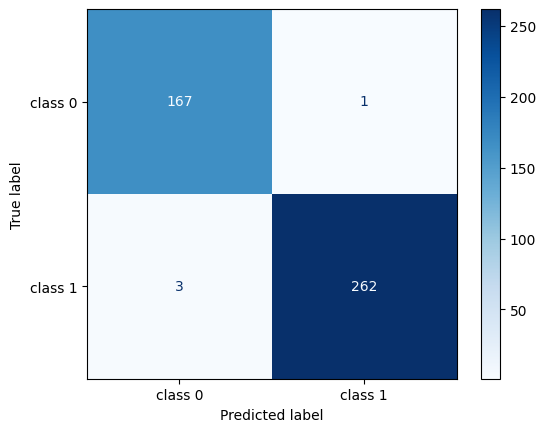

In [120]:
y_pred_probarfe = best_modelfrnrfe.predict(X_test_rfe)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfe = (y_pred_probarfe > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testrfe, y_predfrnrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predfrnrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [121]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predfrnrfe))

El coeficiente de correlacion de Matthews es de  0.9806365389385855


In [122]:
y_predfrnrfe_flat=y_predfrnrfe.flatten()
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predfrnrfe_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    168
1    265
Name: Quinceavo, dtype: int64
Aciertos de Predicción:
 0    167
1    262
Name: Quinceavo, dtype: int64
Errores de Predicción:
 0    1
1    3
Name: Quinceavo, dtype: int64
Total Correctas: 429, Total Errores: 4


### Optuna y FI

In [123]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_fi.shape[1]

#Creo el modelo
best_modelrnfi= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrnfi, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelrnfi

    #Callback
    callback= EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrnfi.fit(X_train_fi, y_trainfi, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrnfi.evaluate(X_test_fi, y_testfi, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelrnfi = modelrnfi  # Almacena el modelo si es el mejor hasta ahora

    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  7 units per layer:  [256, 256, 1024, 768, 1024, 768, 768]


Best trial: 0. Best value: 0.990291:   1%|          | 1/100 [00:36<1:00:24, 36.61s/it]

Capas  4 units per layer:  [1024, 256, 768, 1024]


Best trial: 0. Best value: 0.990291:   2%|▏         | 2/100 [00:46<33:48, 20.70s/it]  

Capas  1 units per layer:  [768]


Best trial: 2. Best value: 0.992233:   3%|▎         | 3/100 [01:21<43:58, 27.20s/it]

Capas  3 units per layer:  [768, 1024, 768]


Best trial: 2. Best value: 0.992233:   4%|▍         | 4/100 [01:34<34:38, 21.65s/it]

Capas  3 units per layer:  [1024, 768, 768]


Best trial: 2. Best value: 0.992233:   5%|▌         | 5/100 [04:11<1:51:59, 70.73s/it]

Capas  5 units per layer:  [768, 768, 512, 768, 256]


Best trial: 2. Best value: 0.992233:   6%|▌         | 6/100 [10:51<4:45:55, 182.51s/it]

Capas  4 units per layer:  [768, 512, 1024, 768]


Best trial: 2. Best value: 0.992233:   7%|▋         | 7/100 [11:32<3:30:57, 136.10s/it]

Capas  5 units per layer:  [768, 768, 512, 256, 256]


Best trial: 2. Best value: 0.992233:   8%|▊         | 8/100 [11:38<2:25:19, 94.78s/it] 

Capas  3 units per layer:  [256, 768, 1024]


Best trial: 2. Best value: 0.992233:   9%|▉         | 9/100 [13:13<2:24:04, 94.99s/it]

Capas  5 units per layer:  [512, 768, 768, 768, 512]


Best trial: 2. Best value: 0.992233:  10%|█         | 10/100 [16:09<2:59:56, 119.96s/it]

Capas  1 units per layer:  [512]


Best trial: 2. Best value: 0.992233:  11%|█         | 11/100 [17:03<2:27:59, 99.77s/it] 

Capas  1 units per layer:  [256]


Best trial: 2. Best value: 0.992233:  12%|█▏        | 12/100 [18:29<2:19:57, 95.43s/it]

Capas  2 units per layer:  [512, 1024]


Best trial: 2. Best value: 0.992233:  13%|█▎        | 13/100 [19:22<1:59:53, 82.69s/it]

Capas  2 units per layer:  [256, 512]


Best trial: 2. Best value: 0.992233:  14%|█▍        | 14/100 [20:35<1:54:18, 79.76s/it]

Capas  8 units per layer:  [512, 512, 256, 256, 1024, 256, 256, 512]


Best trial: 2. Best value: 0.992233:  15%|█▌        | 15/100 [22:11<1:59:50, 84.59s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 2. Best value: 0.992233:  16%|█▌        | 16/100 [25:33<2:47:48, 119.87s/it]

Capas  1 units per layer:  [256]


Best trial: 2. Best value: 0.992233:  17%|█▋        | 17/100 [25:38<1:58:20, 85.55s/it] 

Capas  3 units per layer:  [512, 512, 1024]


Best trial: 2. Best value: 0.992233:  18%|█▊        | 18/100 [25:52<1:27:12, 63.81s/it]

Capas  6 units per layer:  [768, 256, 256, 512, 768, 1024]


Best trial: 2. Best value: 0.992233:  19%|█▉        | 19/100 [27:04<1:29:41, 66.44s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 19. Best value: 0.994175:  20%|██        | 20/100 [35:18<4:19:31, 194.65s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 19. Best value: 0.994175:  21%|██        | 21/100 [43:45<6:19:51, 288.50s/it]

Capas  3 units per layer:  [1024, 1024, 1024]


Best trial: 19. Best value: 0.994175:  22%|██▏       | 22/100 [1:00:20<10:50:41, 500.53s/it]

Capas  1 units per layer:  [768]


Best trial: 19. Best value: 0.994175:  23%|██▎       | 23/100 [1:01:28<7:55:50, 370.79s/it] 

Capas  2 units per layer:  [1024, 768]


Best trial: 19. Best value: 0.994175:  24%|██▍       | 24/100 [1:07:40<7:50:05, 371.12s/it]

Capas  4 units per layer:  [768, 1024, 512, 1024]


Best trial: 19. Best value: 0.994175:  25%|██▌       | 25/100 [1:18:20<9:24:56, 451.96s/it]

Capas  3 units per layer:  [512, 768, 1024]


Best trial: 19. Best value: 0.994175:  26%|██▌       | 26/100 [1:19:44<7:01:03, 341.40s/it]

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  27%|██▋       | 27/100 [1:19:53<4:54:03, 241.69s/it]

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  28%|██▊       | 28/100 [1:20:02<3:26:15, 171.88s/it]

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  29%|██▉       | 29/100 [1:20:11<2:25:44, 123.16s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 19. Best value: 0.994175:  30%|███       | 30/100 [1:20:46<1:52:45, 96.66s/it] 

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  31%|███       | 31/100 [1:20:55<1:20:55, 70.37s/it]

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  32%|███▏      | 32/100 [1:21:00<57:17, 50.55s/it]  

Capas  2 units per layer:  [1024, 512]


Best trial: 19. Best value: 0.994175:  33%|███▎      | 33/100 [1:21:20<46:12, 41.38s/it]

Capas  1 units per layer:  [1024]


Best trial: 19. Best value: 0.994175:  34%|███▍      | 34/100 [1:21:22<32:47, 29.81s/it]

Capas  1 units per layer:  [768]


Best trial: 19. Best value: 0.994175:  35%|███▌      | 35/100 [1:21:31<25:32, 23.58s/it]

Capas  2 units per layer:  [1024, 256]


Best trial: 19. Best value: 0.994175:  36%|███▌      | 36/100 [1:21:36<19:05, 17.91s/it]

Capas  1 units per layer:  [768]


Best trial: 19. Best value: 0.994175:  37%|███▋      | 37/100 [1:21:43<15:28, 14.73s/it]

Capas  7 units per layer:  [768, 1024, 256, 512, 768, 256, 1024]


Best trial: 19. Best value: 0.994175:  38%|███▊      | 38/100 [1:22:44<29:20, 28.40s/it]

Capas  4 units per layer:  [1024, 512, 512, 256]


Best trial: 19. Best value: 0.994175:  39%|███▉      | 39/100 [1:24:06<45:15, 44.52s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 19. Best value: 0.994175:  40%|████      | 40/100 [1:24:19<35:02, 35.05s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 19. Best value: 0.994175:  41%|████      | 41/100 [1:24:34<28:37, 29.11s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 19. Best value: 0.994175:  42%|████▏     | 42/100 [1:24:49<24:06, 24.95s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 19. Best value: 0.994175:  43%|████▎     | 43/100 [1:25:05<21:04, 22.18s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 19. Best value: 0.994175:  44%|████▍     | 44/100 [1:25:20<18:46, 20.11s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 44. Best value: 0.996117:  45%|████▌     | 45/100 [1:25:40<18:20, 20.00s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 44. Best value: 0.996117:  46%|████▌     | 46/100 [1:26:00<17:58, 19.97s/it]

Capas  2 units per layer:  [1024, 1024]


Best trial: 44. Best value: 0.996117:  47%|████▋     | 47/100 [1:26:20<17:39, 19.99s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  48%|████▊     | 48/100 [1:26:26<13:48, 15.93s/it]

Capas  6 units per layer:  [1024, 1024, 768, 512, 512, 1024]


Best trial: 44. Best value: 0.996117:  49%|████▉     | 49/100 [1:27:13<21:25, 25.20s/it]

Capas  2 units per layer:  [768, 1024]


Best trial: 44. Best value: 0.996117:  50%|█████     | 50/100 [1:27:40<21:24, 25.68s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  51%|█████     | 51/100 [1:27:45<15:59, 19.59s/it]

Capas  3 units per layer:  [1024, 768, 512]


Best trial: 44. Best value: 0.996117:  52%|█████▏    | 52/100 [1:28:03<15:10, 18.96s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  53%|█████▎    | 53/100 [1:28:13<12:44, 16.26s/it]

Capas  3 units per layer:  [1024, 1024, 256]


Best trial: 44. Best value: 0.996117:  54%|█████▍    | 54/100 [1:28:32<13:11, 17.20s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  55%|█████▌    | 55/100 [1:28:48<12:29, 16.66s/it]

Capas  4 units per layer:  [1024, 1024, 512, 1024]


Best trial: 44. Best value: 0.996117:  56%|█████▌    | 56/100 [1:29:23<16:12, 22.11s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  57%|█████▋    | 57/100 [1:29:29<12:25, 17.33s/it]

Capas  3 units per layer:  [768, 768, 256]


Best trial: 44. Best value: 0.996117:  58%|█████▊    | 58/100 [1:34:08<1:07:03, 95.79s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  59%|█████▉    | 59/100 [1:34:24<49:07, 71.90s/it]  

Capas  5 units per layer:  [768, 512, 768, 512, 256]


Best trial: 44. Best value: 0.996117:  60%|██████    | 60/100 [1:36:46<1:02:01, 93.03s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  61%|██████    | 61/100 [1:36:55<44:05, 67.84s/it]  

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  62%|██████▏   | 62/100 [1:37:11<33:02, 52.17s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  63%|██████▎   | 63/100 [1:37:26<25:23, 41.18s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  64%|██████▍   | 64/100 [1:37:40<19:40, 32.79s/it]

Capas  3 units per layer:  [1024, 1024, 512]


Best trial: 44. Best value: 0.996117:  65%|██████▌   | 65/100 [1:38:07<18:12, 31.21s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  66%|██████▌   | 66/100 [1:39:34<27:11, 47.99s/it]

Capas  2 units per layer:  [1024, 512]


Best trial: 44. Best value: 0.996117:  67%|██████▋   | 67/100 [1:39:44<20:06, 36.57s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  68%|██████▊   | 68/100 [1:39:54<15:10, 28.45s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 44. Best value: 0.996117:  69%|██████▉   | 69/100 [1:41:50<28:23, 54.96s/it]

Capas  2 units per layer:  [768, 1024]


Best trial: 44. Best value: 0.996117:  70%|███████   | 70/100 [1:46:42<1:02:59, 125.98s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  71%|███████   | 71/100 [1:46:48<43:28, 89.96s/it]   

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 44. Best value: 0.996117:  72%|███████▏  | 72/100 [1:47:03<31:30, 67.53s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 44. Best value: 0.996117:  73%|███████▎  | 73/100 [1:47:19<23:20, 51.88s/it]

Capas  4 units per layer:  [1024, 768, 512, 256]


Best trial: 44. Best value: 0.996117:  74%|███████▍  | 74/100 [1:47:38<18:12, 42.04s/it]

Capas  2 units per layer:  [256, 768]


Best trial: 44. Best value: 0.996117:  75%|███████▌  | 75/100 [1:47:46<13:19, 31.99s/it]

Capas  4 units per layer:  [1024, 768, 256, 1024]


Best trial: 44. Best value: 0.996117:  76%|███████▌  | 76/100 [1:48:09<11:39, 29.16s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 44. Best value: 0.996117:  77%|███████▋  | 77/100 [1:48:21<09:12, 24.03s/it]

Capas  8 units per layer:  [1024, 256, 512, 512, 768, 512, 256, 1024]


Best trial: 44. Best value: 0.996117:  78%|███████▊  | 78/100 [1:57:44<1:08:08, 185.83s/it]

Capas  2 units per layer:  [1024, 512]


Best trial: 44. Best value: 0.996117:  79%|███████▉  | 79/100 [1:58:04<47:36, 136.01s/it]  

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  80%|████████  | 80/100 [1:58:11<32:27, 97.39s/it] 

Capas  3 units per layer:  [1024, 1024, 768]


Best trial: 44. Best value: 0.996117:  81%|████████  | 81/100 [1:58:58<25:59, 82.10s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  82%|████████▏ | 82/100 [1:59:13<18:39, 62.19s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  83%|████████▎ | 83/100 [1:59:29<13:40, 48.28s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  84%|████████▍ | 84/100 [1:59:45<10:16, 38.51s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  85%|████████▌ | 85/100 [1:59:51<07:13, 28.91s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  86%|████████▌ | 86/100 [2:00:07<05:49, 24.99s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  87%|████████▋ | 87/100 [2:00:33<05:26, 25.09s/it]

Capas  4 units per layer:  [1024, 768, 512, 768]


Best trial: 44. Best value: 0.996117:  88%|████████▊ | 88/100 [2:00:59<05:06, 25.56s/it]

Capas  2 units per layer:  [512, 1024]


Best trial: 44. Best value: 0.996117:  89%|████████▉ | 89/100 [2:04:10<13:47, 75.24s/it]

Capas  6 units per layer:  [1024, 512, 256, 1024, 512, 768]


Best trial: 44. Best value: 0.996117:  90%|█████████ | 90/100 [2:04:40<10:15, 61.59s/it]

Capas  1 units per layer:  [1024]


Best trial: 44. Best value: 0.996117:  91%|█████████ | 91/100 [2:04:48<06:48, 45.37s/it]

Capas  3 units per layer:  [1024, 768, 512]


Best trial: 44. Best value: 0.996117:  92%|█████████▏| 92/100 [2:05:05<04:56, 37.08s/it]

Capas  3 units per layer:  [1024, 768, 512]


Best trial: 44. Best value: 0.996117:  93%|█████████▎| 93/100 [2:05:19<03:30, 30.02s/it]

Capas  3 units per layer:  [1024, 768, 256]


Best trial: 44. Best value: 0.996117:  94%|█████████▍| 94/100 [2:05:34<02:33, 25.58s/it]

Capas  3 units per layer:  [1024, 768, 768]


Best trial: 44. Best value: 0.996117:  95%|█████████▌| 95/100 [2:05:58<02:05, 25.08s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  96%|█████████▌| 96/100 [2:06:11<01:25, 21.39s/it]

Capas  4 units per layer:  [1024, 1024, 256, 256]


Best trial: 44. Best value: 0.996117:  97%|█████████▋| 97/100 [2:06:36<01:07, 22.59s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117:  98%|█████████▊| 98/100 [2:06:54<00:42, 21.04s/it]

Capas  3 units per layer:  [1024, 1024, 512]


Best trial: 44. Best value: 0.996117:  99%|█████████▉| 99/100 [2:16:28<03:07, 187.12s/it]

Capas  2 units per layer:  [1024, 768]


Best trial: 44. Best value: 0.996117: 100%|██████████| 100/100 [2:16:44<00:00, 82.04s/it] 

Elapsed time: 136.74 min.


In [124]:
X_test_fi.shape

(515, 9)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       251
           1       1.00      0.99      1.00       264

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



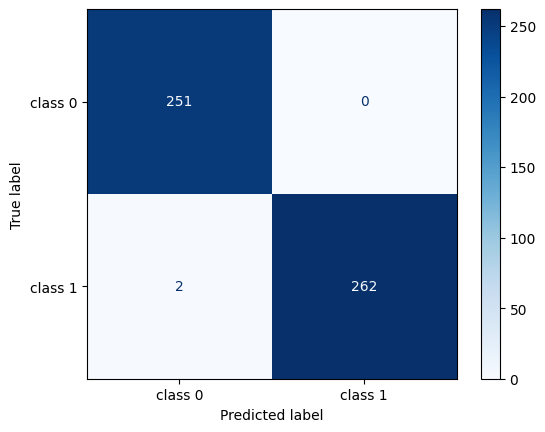

In [125]:
y_pred_probafi = best_modelrnfi.predict(X_test_fi)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnfi = (y_pred_probafi > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testfi, y_predfrnfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predfrnfi, display_labels=target_names, cmap=plt.cm.Blues)

In [126]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predfrnfi))

El coeficiente de correlacion de Matthews es de  0.992259538374909


In [127]:
y_predfrnfi_flat=y_predfrnfi.flatten()

df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predfrnfi_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Dieciseisavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    251
1    264
Name: Dieciseisavo, dtype: int64
Aciertos de Predicción:
 0    251
1    262
Name: Dieciseisavo, dtype: int64
Errores de Predicción:
 0    NaN
1    2.0
Name: Dieciseisavo, dtype: float64
Total Correctas: 513, Total Errores: 2


# Validacion

## RFE

In [128]:
X_test_rfe.columns

Index(['min_bpktl', 'max_bipt', 'mean_flowpktl'], dtype='object')

In [152]:
dftrrfe=df_val_f.copy()
dftrrfe.shape


dftrfe=dftrrfe[['min_bpktl', 'max_bipt', 'mean_flowpktl','label']].copy()
print(dftrfe.shape)


# Eliminar duplicados
print("Duplicados: ",dftrfe.duplicated().sum())

dftrfe = dftrfe.drop_duplicates()

print("Valores nulos: ", dftrfe.isnull().values.sum())
dftrfe.dropna(inplace=True)

#collections.Counter(df.dftrfe.values)
# Balancear clases con subsampling (reduce clase mayoritaria)
df_class0_val = dftrfe[dftrfe['label'] == 0]
df_class1_val = dftrfe[dftrfe['label'] == 1]


df_class1_down_val = resample(df_class1_val,
                             replace=False,
                             n_samples=len(df_class0_val),
                             random_state=42)

# Dataset balanceado para validación
df_val_balanced = pd.concat([df_class0_val, df_class1_down_val])

# Mezclar datos
df_val_balanced = df_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_val_balanced['label'].value_counts())


dftrfe_test = df_val_balanced['label']
dftrfet = df_val_balanced.drop(columns=['label'])


# dftrfe_test=dftrfe['label']
# dftrfet=dftrfe.drop(columns=['label']) 


numeric_colsdftr = dftrfet.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdftr)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftrfet)
dftrfet_stand = preprocessor.transform(dftrfet)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdftrfe=list(dftrfet.columns.values.tolist())
df_rfe_dft_stand=pd.DataFrame(dftrfet_stand,columns=labelsdftrfe)

print("Valores nulos: ", df_rfe_dft_stand.isnull().values.sum())
print("Duplicados: ",df_rfe_dft_stand.duplicated().sum())


(2029, 4)
Duplicados:  104
Valores nulos:  0
label
0    113
1    113
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98       113
     class 1       0.98      0.98      0.98       113

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226



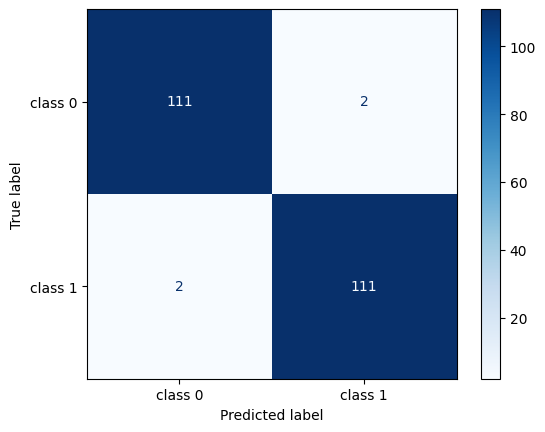

In [153]:
y_predbrlorfedt = best_modelrlo.predict(df_rfe_dft_stand)



#performance results
print(classification_report(dftrfe_test, y_predbrlorfedt, target_names=target_names))

cm = confusion_matrix(dftrfe_test, y_predbrlorfedt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.34), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(4), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(100), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9920693561893502
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.87      0.71       113
           1       0.

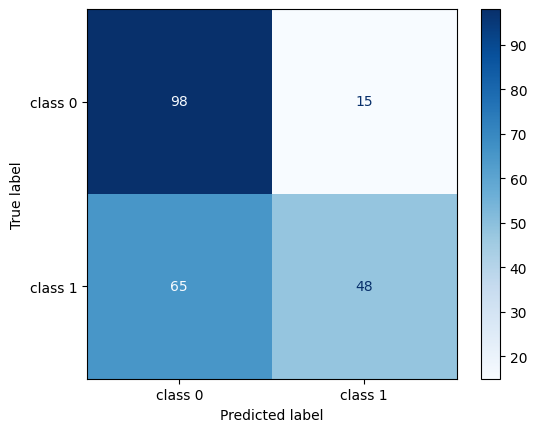

In [154]:


# Predecir y evaluar el modelo
y_predxgbrfedft = grid_xgbrfe.predict(df_rfe_dft_stand)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(dftrfe_test, y_predxgbrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predxgbrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.9823008849557522
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       113
           1       0.98      0.98      0.98       113

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226



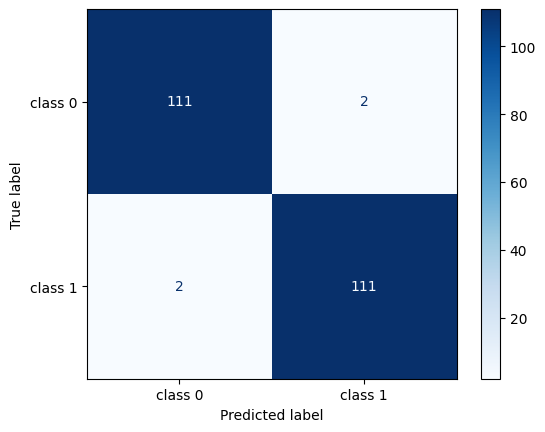

In [155]:
y_predsvmrfedft = best_modelsvmrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_predsvmrfedft))
print("Classification Report:\n", classification_report(dftrfe_test, y_predsvmrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predsvmrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.9867256637168141
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       113
           1       0.99      0.98      0.99       113

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226

El coeficiente de correlacion de Matthews es de  0.9734894474315845


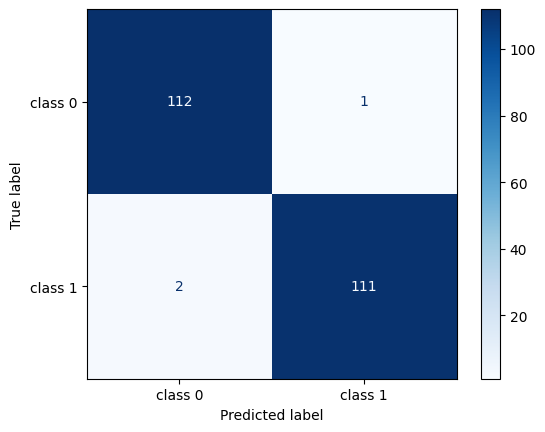

In [160]:

y_prednvrfetestr=clfnvrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_prednvrfetestr))
print("Classification Report:\n", classification_report(dftrfe_test, y_prednvrfetestr))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_prednvrfetestr, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_prednvrfetestr))



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       113
           1       0.93      0.99      0.96       113

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



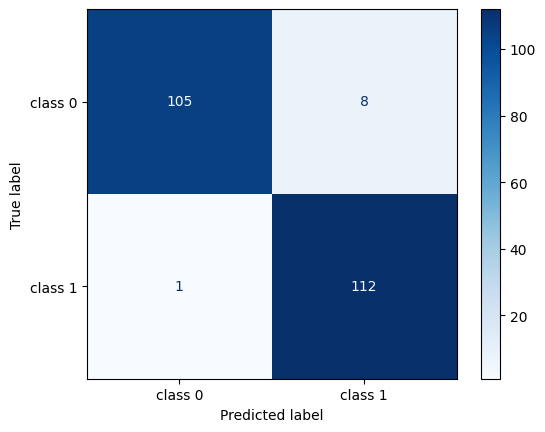

In [135]:
y_pred_probarfedft = best_modelfrnrfe.predict(df_rfe_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfedft = (y_pred_probarfedft > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dftrfe_test, y_predfrnrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predfrnrfedft, display_labels=target_names, cmap=plt.cm.Blues)

In [136]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_predfrnrfedft))

El coeficiente de correlacion de Matthews es de  0.9221249727714812


## FI


In [137]:
X_test_fi.columns

Index(['flowduration', 'total_bpackets', 'min_fipt', 'std_fipt',
       'fPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'flow_ack'],
      dtype='object')

In [138]:
dftee=df_val_f.copy()
dftee.shape


dft=dftee[['flowduration', 'total_bpackets', 'min_fipt', 'std_fipt',
       'fPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'flow_ack','label']].copy()
print(dft.shape)


# Eliminar duplicados
print("Duplicados: ",dft.duplicated().sum())

dft = dft.drop_duplicates()

print("Valores nulos: ", dft.isnull().values.sum())
dft.dropna(inplace=True)

#collections.Counter(df.dft.values)

# Balancear clases con subsampling (reduce clase mayoritaria)
dffi_class0_val = dft[dft['label'] == 0]
dffi_class1_val = dft[dft['label'] == 1]


dffi_class1_down_val = resample(dffi_class1_val,
                             replace=False,
                             n_samples=len(dffi_class0_val),
                             random_state=42)

# Dataset balanceado para validación
dffi_val_balanced = pd.concat([dffi_class0_val, dffi_class1_down_val])

# Mezclar datos
dffi_val_balanced = dffi_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(dffi_val_balanced['label'].value_counts())


dft_test = dffi_val_balanced['label']
dftt = dffi_val_balanced.drop(columns=['label'])

# dft_test=dft['label']
# dftt=dft.drop(columns=['label']) 


numeric_colsdft = dftt.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdft)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftt)
dft_stand = preprocessor.transform(dftt)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdft=list(dftt.columns.values.tolist())
df_dft_stand=pd.DataFrame(dft_stand,columns=labelsdft)

print("Valores nulos: ", dftt.isnull().values.sum())
print("Duplicados: ",dftt.duplicated().sum())



(2029, 10)
Duplicados:  0
Valores nulos:  0
label
1    148
0    148
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


In [139]:
# Testing model
#dtfi, mdtop
y_preddttfi = mdtop.predict(df_dft_stand)
y_probdttfi = mdtop.predict_proba(df_dft_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddttfi, dft_test))

Accuracy of Decision Tree-Test:  0.9527027027027027


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       148
           1       1.00      0.91      0.95       148

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296



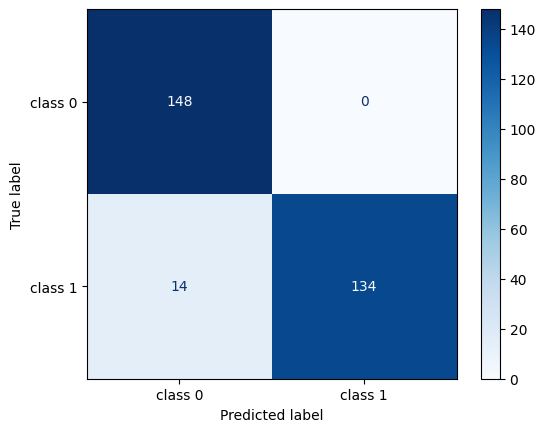

In [140]:
#Classification for test before hyperparameter tuning
print(classification_report(dft_test,y_preddttfi))
ConfusionMatrixDisplay.from_predictions(dft_test, y_preddttfi, display_labels=target_names, cmap=plt.cm.Blues)

Mejor modelo accuracy score: 0.5372
Mejores parámetros:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(420)}
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       148
           1       1.00      0.07      0.14       148

    accuracy                           0.54       296
   macro avg       0.76      0.54      0.41       296
weighted avg       0.76      0.54      0.41       296



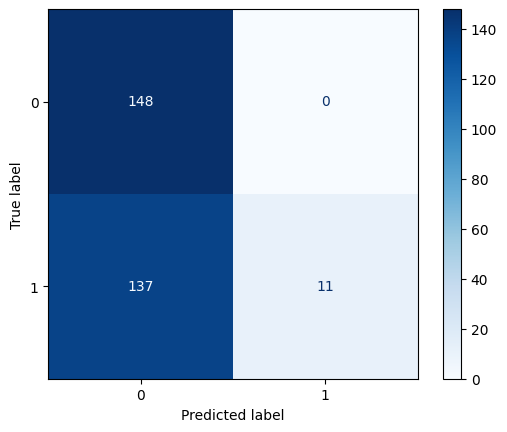

In [141]:
#RF
y_predrft = best_clfrf.predict(df_dft_stand)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(dft_test, y_predrft)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(dft_test, y_predrft))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(dft_test, y_predrft, cmap=plt.cm.Blues);

In [142]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predrft))

El coeficiente de correlacion de Matthews es de  0.19645989725150062


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       148
           1       0.00      0.00      0.00       148

    accuracy                           0.50       296
   macro avg       0.25      0.50      0.33       296
weighted avg       0.25      0.50      0.33       296



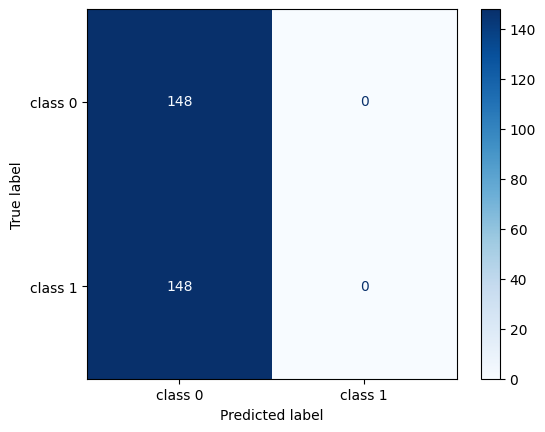

In [143]:
# Predecir y evaluar el modelo
y_predxgbfit = grid_xgbfi.predict(df_dft_stand)
print("Classification Report:\n", classification_report(dft_test, y_predxgbfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predxgbfit, display_labels=target_names, cmap=plt.cm.Blues)

In [144]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predxgbfit))

El coeficiente de correlacion de Matthews es de  0.0


Accuracy: 0.9932432432432432
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.99      0.99       148

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



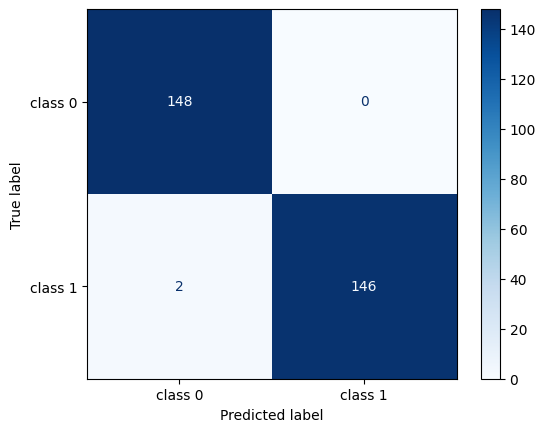

In [145]:

y_predsvmtfit = best_modelsvmdt.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_predsvmtfit))
print("Classification Report:\n", classification_report(dft_test, y_predsvmtfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predsvmtfit, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.5033783783783784
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       148
           1       1.00      0.01      0.01       148

    accuracy                           0.50       296
   macro avg       0.75      0.50      0.34       296
weighted avg       0.75      0.50      0.34       296

El coeficiente de correlacion de Matthews es de  0.0582222509739582


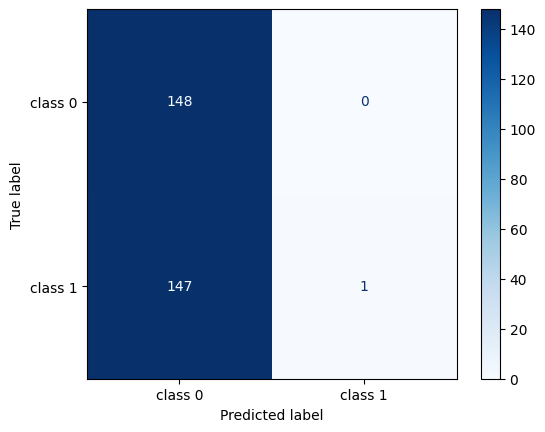

In [146]:
y_prednvfit=clfnv.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_prednvfit))
print("Classification Report:\n", classification_report(dft_test, y_prednvfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_prednvfit, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_prednvfit))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       148
           1       0.80      0.85      0.83       148

    accuracy                           0.82       296
   macro avg       0.82      0.82      0.82       296
weighted avg       0.82      0.82      0.82       296



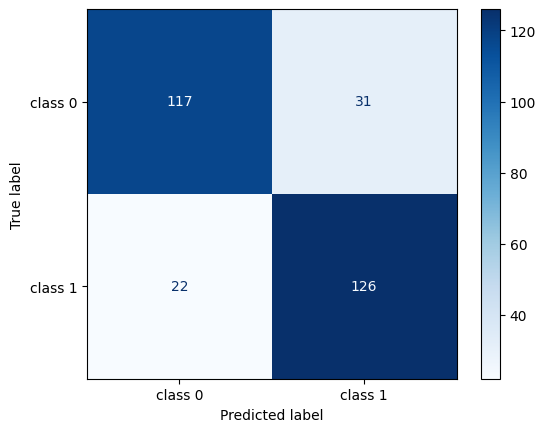

In [147]:
y_pred_probadftt = best_modelrnfi.predict(df_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrndftt = (y_pred_probadftt > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dft_test, y_predfrndftt))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predfrndftt, display_labels=target_names, cmap=plt.cm.Blues)